# Machine Learning Approaches for Bank Deposit Prediction
### Data Scientist: Handoyo Suryo Laksono

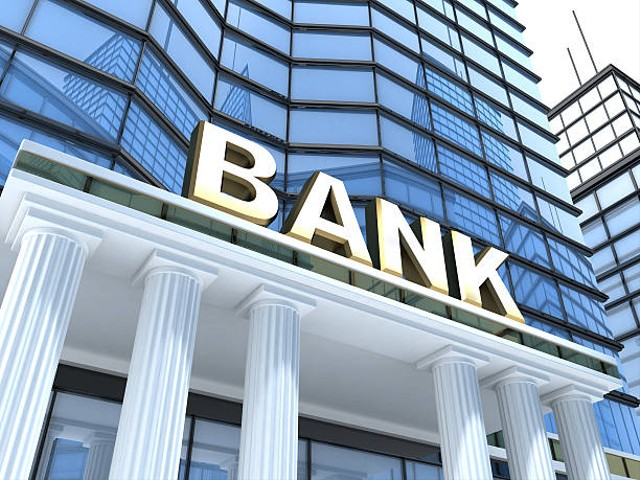

# List of contents
    
**Business Problem Understanding**

**Data Understanding**

**Data Cleaning**

**Data Splitting**

**Data Preparation**

**Modeling & Evaluation**

**Conclusion & Recommendation**

**Saving Model**

# Abstract

The choice of financial products available to the public is increasingly diverse, including time deposits. This product allows customers to save funds in a bank or financial institution with the provision of withdrawals only after a certain period of time. In return, customers receive a fixed interest rate based on the amount of deposits. To stay competitive and attract more customers, banks often rely on marketing campaigns. Bank Laks' business development division plans to increase the effectiveness of their campaigns through special promotions, product education, and strengthening relationships with potential customers.

The bank has a dataset of previous marketing campaign results, which includes data such as age, profession, account balance, home ownership, debt status, type of communication media used, month of last interaction, number of contacts, interval since last interaction, and campaign results.

As a data scientist at Bank Laks, I processed the data and selected the Random Forest Classifier to predict the likelihood of customers making deposits. This model was selected after going through a process of hyperparameter tuning and threshold adjustment, with a focus on optimized recall. The evaluation showed that Random Forest produced quite good results, with a confusion matrix showing 515 true negatives, 567 true positives, 179 false negatives, and 300 false positives. This model has a high recall of 0.76, although the F1-score is recorded at 0.66. The factors that most influence the model's prediction include previous campaign success, home ownership, loan status, time since last contact, customer balance, and status as a student or retiree. By using this model, Bank Laks can improve marketing efficiency, utilize resources optimally, and increase revenue from deposit products.

# Business Problem Understanding

**Context**

  The choice of financial products offered to the public is increasingly diverse, one of which is time deposits. This product allows customers to save funds in a bank or financial institution, with the provision that the funds can only be withdrawn after a certain period of time. In return, customers receive a fixed interest based on the amount of their savings.

  However, banks as financial institutions must continue to compete to retain customers and attract new customers. One common strategy used is through structured and effective marketing campaigns.

**Problem Statement**

 - The business development division at Bank Laks seeks to improve the success of marketing campaigns with a more adaptive, data-driven approach. The goal is to accurately identify potential customers, understand their needs, and provide more relevant offers.

  With this approach, historical data and customer behavior patterns will be utilized to dig deeper insights. As a result, marketing campaigns can be designed specifically for audiences who really need or will make deposits.

  Through the implementation of this strategy, Bank Laks can:

  - Target more appropriate customers to increase deposit conversion rates.
  - Optimize marketing resources by reducing waste.
  - Strengthen long-term relationships with customers through relevant and personalized approaches.

**Goals**

 - Bank Laks provides a dataset of previous marketing campaign results. This dataset aims to help predict the type of audience that has the highest chance of opening a deposit at the bank.

  - Available data includes features such as:

    - Age
    - Type of employment
    - Account balance
    - Home ownership
    - Debt status
    - Communication media used
    - Month of last contact
    - Number of contacts during the campaign
    - Length of time since last contact
    - Results of previous marketing campaigns

This dataset will be used to build machine learning models that can produce more accurate predictions than rule-based or traditional approaches.

**Analytic Approach**

As a data scientist at Bank Laks, I will conduct data preparation processes and test various classification models to select the most appropriate one. The models to be tested include:

- Logistic Regression
- Decision Trees
- Random Forest
- K-Nearest Neighbors (KNN)
- Support Vector Machine (SVM)
- XGBoost
- LightGBM
- Naive Bayes
- AdaBoost
- Logistic Regression (ElasticNet)

**Metric Evaluation**

The model performance evaluation will focus on Recall since the main goal is to identify as many customers as possible who will make a deposit. Below is a brief explanation of the evaluation metrics relevant to the Bank Marketing Campaign problem:

- F1-Score: Combines Precision and Recall to provide a balanced measure of the model's accuracy and ability to identify deposit-making customers.
- Precision: Measures the accuracy of the model's predictions, specifically how many of the predicted deposit-making customers are correct.
- Recall: Measures the model's ability to identify all customers who actually make a deposit. This is the main priority to ensure no potential customers are missed.

With this approach, Bank Laks can optimize marketing campaigns, improve resource allocation efficiency, and encourage customer deposit growth.

**Data Source**

The data used in this program is dummy data created for demonstration purposes. This data does not reflect real or accurate information. To access the original data or more information, you can visit the following link: [In Here](https://drive.google.com/drive/u/0/folders/13lrEDlKfnTPNREfGLBaYGYf8dSjHBzfW).

# Data Understanding

## Import Library

In [125]:
!pip install category_encoders

In [126]:
!pip install xgboost

In [127]:
!pip install catboost

In [128]:
# Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import warnings
import pickle

from sklearn.model_selection import (train_test_split, cross_val_score, StratifiedKFold,
                                     GridSearchCV, RandomizedSearchCV, KFold)
from sklearn.preprocessing import (KBinsDiscretizer, OneHotEncoder, MinMaxScaler, LabelEncoder)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (VotingClassifier, StackingClassifier, BaggingClassifier,
                              RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier)
from xgboost.sklearn import XGBClassifier
import lightgbm as lgb
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import (recall_score, confusion_matrix, ConfusionMatrixDisplay,
                             precision_recall_curve, PrecisionRecallDisplay, accuracy_score,
                             classification_report, f1_score, roc_auc_score, roc_curve, auc,
                             precision_score, precision_recall_fscore_support)
from sklearn.datasets import load_iris, make_classification
from sklearn.ensemble import IsolationForest
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.compose import ColumnTransformer
from category_encoders import BinaryEncoder
from scipy.stats import randint

In [129]:
# Read data
df = pd.read_csv("data_bank_marketing_campaign.csv")

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


In [131]:
df.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


**Dataset Information**

 - The dataset contains **7,813 records**.

**Columns in the Dataset:**

| **Category**             | **Column**  | **Description**                                        |
|---------------------------|-------------|--------------------------------------------------------|
| **Customer Profile**      | `age`       | The age of the client                                  |
|                           | `job`       | The client’s job type                                  |
|                           | `balance`   | The client’s account balance                          |
|                           | `housing`   | Whether the client has a housing loan                 |
|                           | `loan`      | Whether the client has a personal loan                |
| **Marketing Data**        | `contact`   | Type of communication contact                         |
|                           | `month`     | The month of the last contact in the year             |
|                           | `campaign`  | Number of contacts made during this campaign for the client |
|                           | `pdays`     | Number of days since the client was contacted from the previous campaign |
|                           | `poutcome`  | Outcome of the previous marketing campaign            |
|                           | `deposit`   | Whether the client made a deposit                     |

**Notes:**
1. The `balance` feature may have negative values due to administrative fees, which can reduce the account balance to negative if the client’s current balance is zero.
2. The `pdays` feature can have a value of `-1`, indicating that the client has never been contacted in the previous campaign.
3. The `poutcome` feature has four possible values:
   - **Success**: The previous campaign succeeded in encouraging the client to use the product.
   - **Failure**: The previous campaign failed to encourage the client to use the product.
   - **Other**: The client did not answer when contacted.
   - **Unknown**: The client was not contacted previously.

We will use the `deposit` column as the **label** to predict, while the other columns will serve as features for the prediction task.


## Missing Values

In [132]:
# Jumlah data kosong (NaN) untuk setiap variable
df.isnull().sum()

,0
age,0
job,0
balance,0
housing,0
loan,0
contact,0
month,0
campaign,0
pdays,0
poutcome,0


In [133]:
missing = pd.DataFrame({'Amount':df.isnull().sum().sort_values(ascending = False)})
missing

,Amount
age,0
job,0
balance,0
housing,0
loan,0
contact,0
month,0
campaign,0
pdays,0
poutcome,0


In [134]:
total_raw_data = len(df)
missing['percentage %'] = round((missing['Amount']/total_raw_data)*100,2)
missing

,Amount,percentage %
age,0,0.0
job,0,0.0
balance,0,0.0
housing,0,0.0
loan,0,0.0
contact,0,0.0
month,0,0.0
campaign,0,0.0
pdays,0,0.0
poutcome,0,0.0


Data has no Missing Value

## Data Duplicated

In [135]:
# number of duplicates
df.duplicated().sum()

8

In [136]:
# check row which duplicated
df[df.duplicated()]

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
2944,40,blue-collar,0,yes,no,unknown,may,2,-1,unknown,no
4368,60,management,0,no,no,cellular,aug,3,-1,unknown,yes
4874,41,management,0,no,no,cellular,aug,2,-1,unknown,no
5326,44,blue-collar,0,yes,no,cellular,jul,1,-1,unknown,no
5609,39,technician,0,yes,no,unknown,may,1,-1,unknown,no
5681,38,technician,0,no,no,cellular,aug,2,-1,unknown,no
5905,34,management,0,no,no,cellular,aug,2,-1,unknown,no
7077,30,blue-collar,239,yes,no,unknown,may,1,-1,unknown,yes


There are 8 duplicated data, this indicates excessive input from the user or system.

In [137]:
# drop duplicate data
# df.drop_duplicates(inplace = True)

## Numeric Variable

### Descriptive Statistics

In [138]:
# Descriptive statistics
df.describe() # AUTOMATICALLY only takes numeric ones

,age,balance,campaign,pdays
count,7813.000000,7813.000000,7813.000000,7813.000000
mean,41.257264,1512.448611,2.519775,51.408550
std,11.919710,3089.291831,2.727001,108.072739
min,18.000000,-6847.000000,1.000000,-1.000000
25%,32.000000,127.000000,1.000000,-1.000000
50%,39.000000,549.000000,2.000000,-1.000000
75%,49.000000,1684.000000,3.000000,40.000000
max,95.000000,66653.000000,63.000000,854.000000


Pembahasan decribe kolom numerik

1. Age
  The range of numbers in the Age column consists of a minimum of 18 years to a maximum of 95 years,

  This range of numbers has no oddities, so the age column does not require further checking.

2. balance
  The range of numbers in the balance column consists of a minimum of -6847 to a maximum of 66653,

  The minus number range is odd, but there is no column that can support minus numbers but I can't immediately remove it so I argue that there is an admin fee in the customers' balance.

3. campaign
  The campaign number range consists of a minimum of 1 to a maximum of 63.

  This number range has no oddities, so the campaign column does not require further checking.

4. pdays
  The pdays number range consists of a minimum of -1 to a maximum of 854,

  The range -1 indicates that the customer has never been contacted before, this range must be checked further, because it could indicate an error between the pdays column and the poutcome column.



#### CHECK COLUMN pdays dan poutcome

In [139]:
df[df['pdays'] == 0]

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit


In [140]:
df['poutcome'].value_counts()

,count
poutcome,
unknown,5819
failure,848
success,761
other,385


In [141]:
# search column poutcome have -1 and pdays have success
df[(df['pdays'] == -1) & (df['poutcome'] == 'success')]

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit


In [142]:
df[(df['pdays'] == -1) & (df['poutcome'] == 'failure')]

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit


In [143]:
df[(df['pdays'] == -1) & (df['poutcome'] == 'other')]

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit


In [144]:
df[(df['pdays'] == -1) & (df['poutcome'] == 'unknown')]

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
5,41,admin.,-76,yes,no,cellular,apr,1,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7807,33,management,0,yes,yes,cellular,may,2,-1,unknown,no
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no


pdays that have -1 have an overall poutcome of unknown

### Data Distribution

In [145]:
len(df.select_dtypes(include = 'number').columns)

4

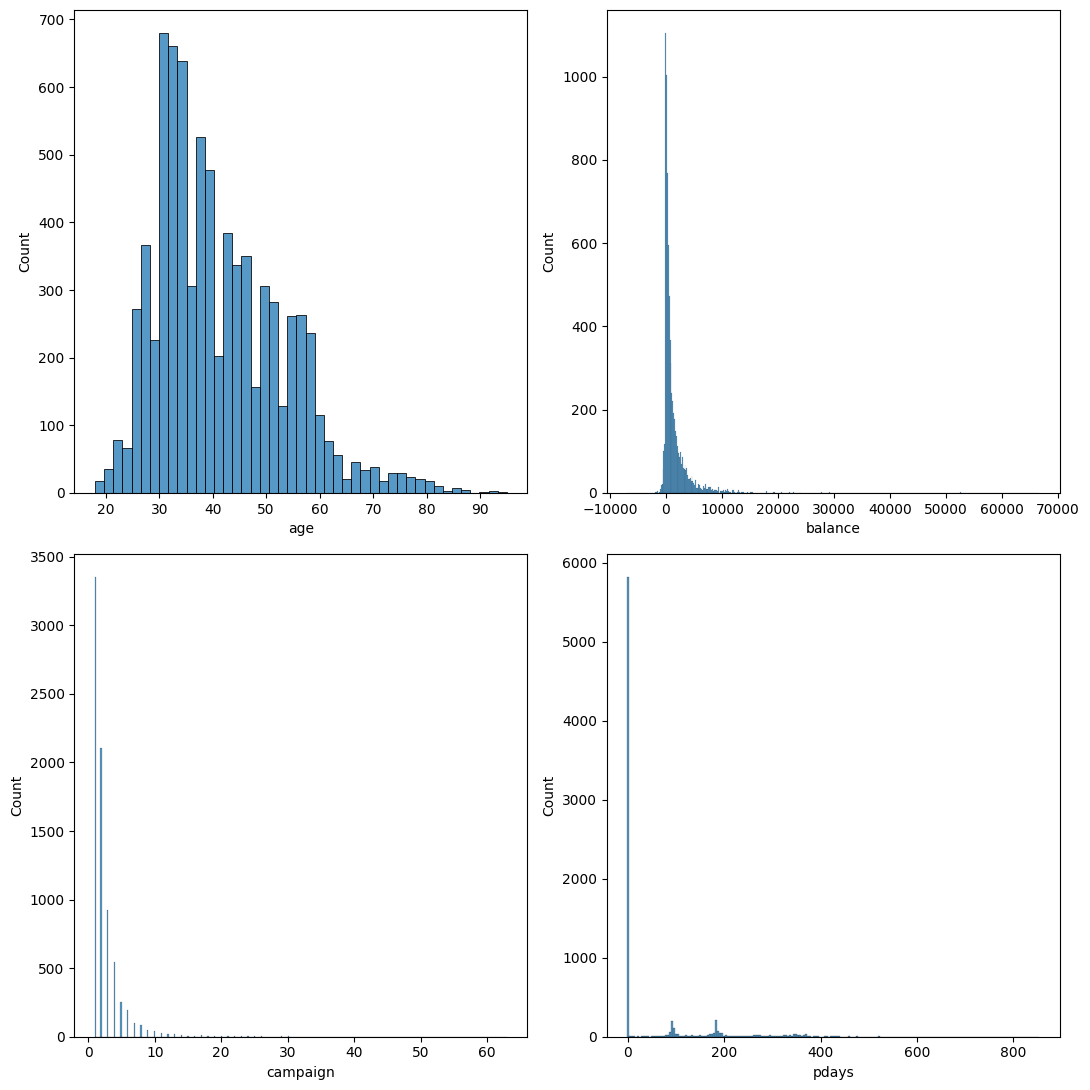

In [146]:
numeric = df.select_dtypes(include = 'number')

# change the size of the frame (the graph container)
plt.figure(figsize = (11,11))

position = 1 # initialize the position starting from 1
for each_column in numeric.columns: # numeric.columns = the names of the columns in the list
  plt.subplot(2,2,position)
  sns.histplot(df[each_column])
  position = position + 1
  # so that they don't overlap
  plt.tight_layout()

The data is not normally distributed, characterized by the data having a tail on the right and most of the data being centered on the left of the graph.

### Outliers

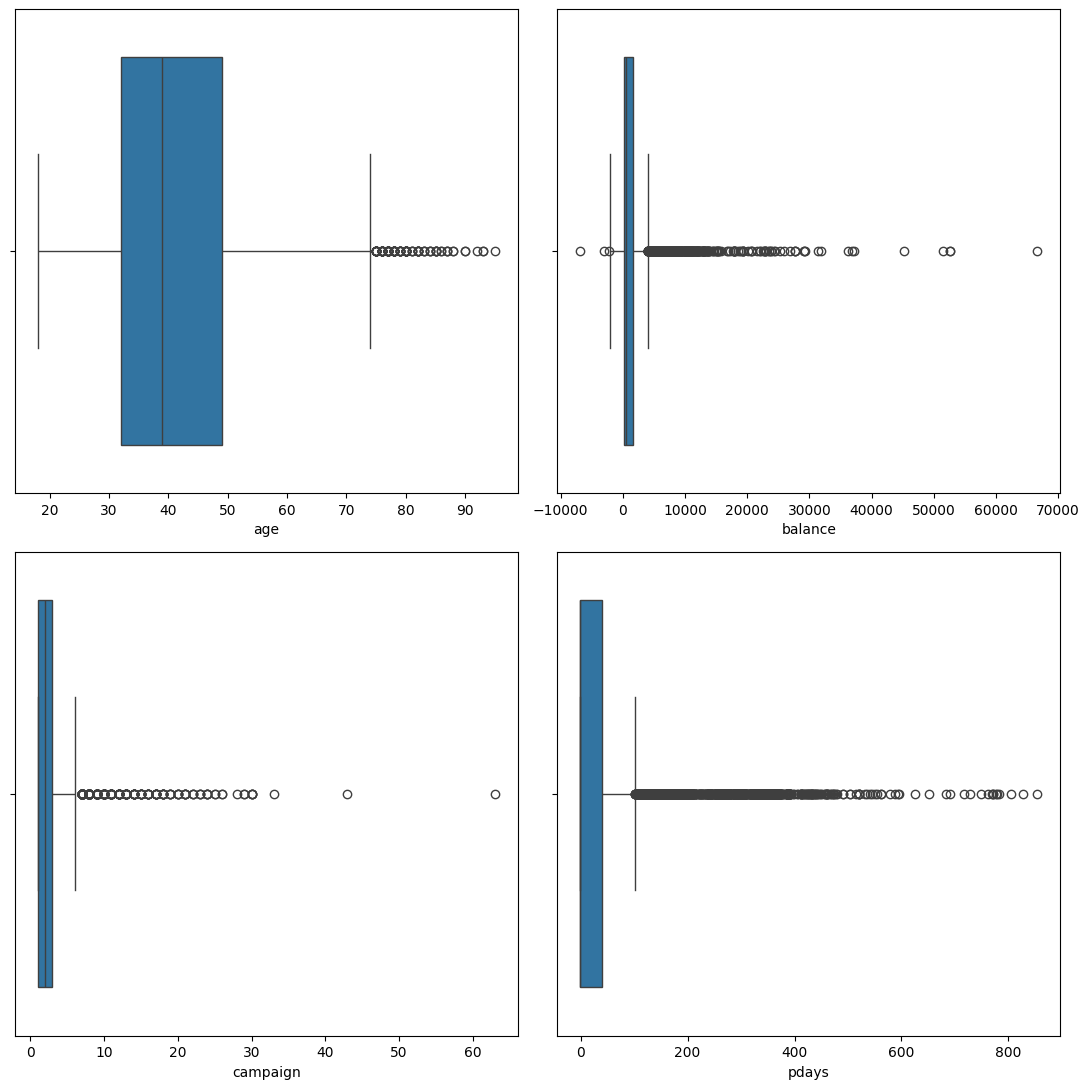

In [147]:
numeric = df.select_dtypes(include = 'number')

# change the size of the frame (the graph container)
plt.figure(figsize = (11,11))

position = 1 # initialize the position starting from 1
for each_column in numeric.columns: # numeric.columns = the names of the columns in the list
  plt.subplot(2,2,position)
  sns.boxplot(x = df[each_column])
  position = position + 1
  # so that they don't overlap
  plt.tight_layout()

Based on the boxplots above, there is no need to remove any outliers. This is because all the values provide valuable information and do not negatively impact the classification process.

### Correlation

<Axes: >

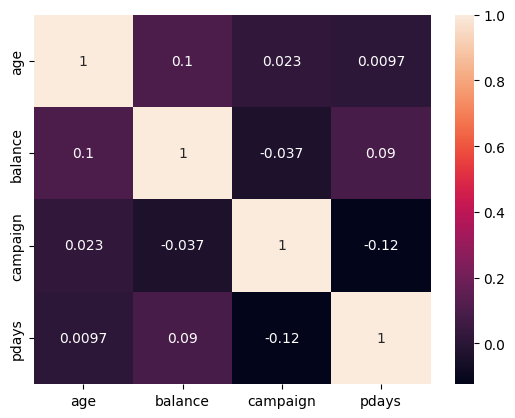

In [148]:
sns.heatmap(numeric.corr(method = 'spearman'), annot = True)

#### Multicollinearity with VIF

In [149]:
# create a function
def calc_vif(x):
    # empty dataframe
    vif = pd.DataFrame()
    vif['variables'] = x.columns
    # calculate VIF for each column
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return vif

In [150]:
calc_vif(numeric.drop(columns = 'age')).sort_values(by = 'VIF', ascending = False)

,variables,VIF
1,campaign,1.127492
0,balance,1.115694
2,pdays,1.073842


In [151]:
calc_vif(numeric.drop(columns = 'balance')).sort_values(by = 'VIF', ascending = False)

,variables,VIF
0,age,2.008562
1,campaign,1.749269
2,pdays,1.213790


In [152]:
calc_vif(numeric.drop(columns = 'campaign')).sort_values(by = 'VIF', ascending = False)

,variables,VIF
0,age,1.450992
1,balance,1.250455
2,pdays,1.208080


In [153]:
calc_vif(numeric.drop(columns = 'pdays')).sort_values(by = 'VIF', ascending = False)

,variables,VIF
0,age,1.991136
2,campaign,1.740622
1,balance,1.250155


There is no column data that has a VIF above 10. If there is column data that has a VIF above 10, you can consider deleting it.

## Categoric Variable

### Describe

In [154]:
df.describe(include = 'object')

,job,housing,loan,contact,month,poutcome,deposit
count,7813,7813,7813,7813,7813,7813,7813
unique,12,2,2,3,12,4,2
top,management,no,no,cellular,may,unknown,no
freq,1792,4140,6789,5628,1976,5819,4081


Each categorical column has its own unique value, in job there are 12 unique values, housing 2 unique values, loan 2 unique values, contact 3 unique values, month 12 unique values, outcome 4 unique values, and deposit 2 unique values.

### Unique Values

In [155]:
categoric = df.select_dtypes(include = 'object')
categoric.nunique()

,0
job,12
housing,2
loan,2
contact,3
month,12
poutcome,4
deposit,2


### Value Counts

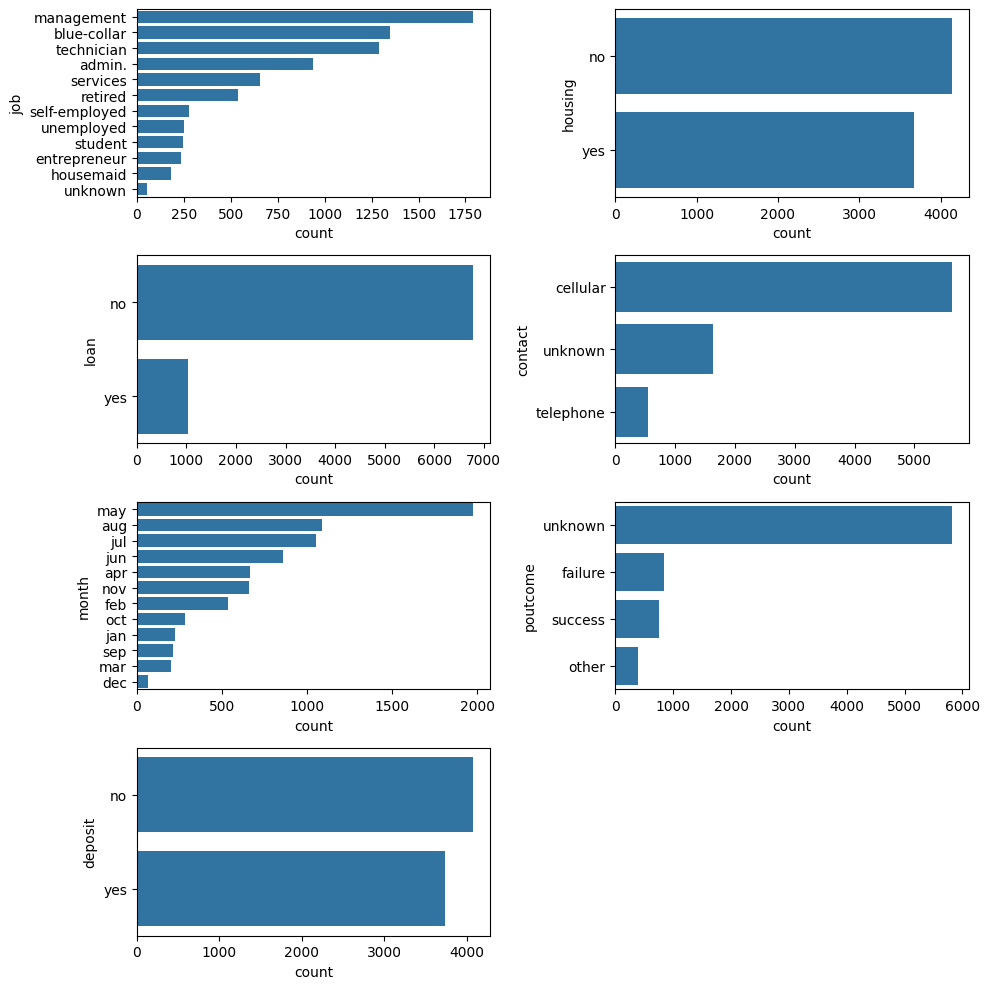

In [156]:
# Change the figure size (container for the plots)
plt.figure(figsize=(10, 10))  # (width, height)

position = 1  # Initialize position starting from 1
for each_column in categoric.columns:  # categorical.columns = list of column names
    plt.subplot(4, 2, position)
    sns.barplot(df[each_column].value_counts().head(15), orient='h')
    position = position + 1
    # Prevent overlapping
    plt.tight_layout()

Overall there are no oddities, but in the job column there is the value "admin." this indicates an input error

# Conclussion of Data Understanding

**Rows and Columns**

The dataset consists of 7813 rows, representing the total number of entries or individuals in the dataset. Each row represents one data entry.
There are 11 columns, each containing information about attributes or variables relevant for analysis. These columns include various types of data, both numerical and categorical.

**Missing Data**

There are no missing values in this dataset. Each entry in the dataset is fully populated in every column, with no empty or missing values. This is beneficial as we do not need to handle missing data, such as imputation or removing incomplete entries.

**Duplicated Data**

There are 8 duplicated entries in this dataset. Duplicated data refers to rows that have identical values to other rows. This duplication can interfere with analysis and should be removed to ensure that analysis results or models are not impacted.
Logical / Illogical Data

There is no illogical data. All the data in the dataset aligns with the expected values and standards for each column. For example, there are no negative ages or unrealistic salary values, indicating that the data is clean and consistent.

**Non-Normal Data Distribution**

The data follows a non-normal distribution. This means that the distribution of values in the dataset does not follow a normal (bell-shaped) curve. Many statistical analysis and machine learning methods assume normal distribution, so it is important to consider this, as it may affect model results. Therefore, data transformation or non-parametric methods may be necessary.

**Outliers**

There are outliers in the columns age, balance, and pdays. Outliers are values that significantly differ from most of the other data. This can be caused by data entry errors or rare occurrences. These outliers should be further analyzed as they can impact the accuracy of statistical analysis and machine learning models.

**Categorical Focus**

The dataset contains 7 categorical columns. These columns contain categorical or label values, such as job type, housing status, loan status, etc. Categorical columns are important for analysis as they allow segmentation and modeling based on specific categories. Encoding may be necessary if categorical columns are to be used in models based on numerical data.

# Next Step Considerations (For Data Cleaning & Feature Engineering)

Data Cleaning

1. Remove duplicate data
2. Replace the value -1 in pdays with "no" which indicates the customer has not been contacted, while positive numbers are changed to "yes" which indicates the customer has been contacted.
3. Change name column pdays with ptalk
4. Replace admin. in the job column with admin
5. Change value of column deposit with numeric for models read the yes or no

Feature Engineering

1. Add Column age_group:
    - This allows you to categorize individuals into distinct age groups, helping to understand patterns or behaviors associated with different age ranges.

2. Add Column balance_per_campaign:
    - This feature provides a metric of how much balance a customer has for each campaign, helping to identify customer financial behavior in relation to specific campaigns.

3. Add Column is_successful_outcome:
    - This feature indicates whether the outcome of a campaign was successful for the customer, making it easier to analyze the effectiveness of campaigns and identify key success factors.

# Data Cleaning

1. Remove duplicate data

In [157]:
# Remove duplicate data
df = df.drop_duplicates()

2. Replace the value -1 in pdays with "no" which indicates the customer has not been contacted, while positive numbers are changed to "yes" which indicates the customer has been contacted.

In [158]:
# Replace -1 values ​​in pdays with 'no' and positive values ​​with 'yes'
df['pdays'] = df['pdays'].apply(lambda x: 'no' if x == -1 else 'yes')

3. Change name column pdays with ptalk

In [159]:
# change column pdays with ptalk
df.rename(columns={'pdays': 'ptalk'}, inplace=True)

4. Replace admin. in the job column with admin

In [160]:
# Replace 'admin.' with 'admin' in the job column
df['job'] = df['job'].replace('admin.', 'admin')

5. Change value of column deposit

In [161]:
# Change value in column deposit yes to 1 and no to 0
df['deposit'] = df['deposit'].replace({'yes': 1, 'no': 0})

In [162]:
df

,age,job,balance,housing,loan,contact,month,campaign,ptalk,poutcome,deposit
0,55,admin,1662,no,no,cellular,jun,2,no,unknown,1
1,39,self-employed,-3058,yes,yes,cellular,apr,3,no,unknown,1
2,51,admin,3025,no,no,cellular,may,1,yes,other,1
3,38,services,-87,yes,no,cellular,may,1,no,unknown,0
4,36,housemaid,205,yes,no,telephone,nov,4,no,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,no,unknown,1
7809,48,housemaid,5473,no,no,cellular,feb,2,yes,success,1
7810,36,unknown,179,no,no,cellular,aug,8,no,unknown,0
7811,31,admin,54,yes,no,cellular,nov,1,no,unknown,0


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7805 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7805 non-null   int64 
 1   job       7805 non-null   object
 2   balance   7805 non-null   int64 
 3   housing   7805 non-null   object
 4   loan      7805 non-null   object
 5   contact   7805 non-null   object
 6   month     7805 non-null   object
 7   campaign  7805 non-null   int64 
 8   ptalk     7805 non-null   object
 9   poutcome  7805 non-null   object
 10  deposit   7805 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 731.7+ KB


## Feature Engineering

Feature additions are made to enrich sources or data, enrich sources or data used by machine learning models in order to better understand patterns. The addition of these features can be a combination of existing features, data transformation results, or external data that is relevant to the problem being analyzed. By enriching features, the model has more information that can be used to produce more accurate predictions and in accordance with the objectives of the analysis.

## age_group

Purpose:

- Dividing the age range into specific buckets (e.g., ‘young’, ‘middle_aged’, ‘senior’, and ‘elder’) makes it easier to analyze patterns based on age groups. This provides more structured information than just numeric age.

- For example, if we want to see if there is a difference in behavior in a campaign based on age, we can analyze the data in more relevant age buckets. This also helps with modeling, as models can more easily handle categories like ‘young’ or ‘middle_aged’ rather than constantly changing age numbers.

In [164]:
# Membuat fitur baru berdasarkan usia (age_group)
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 45, 60, 100], labels=['young', 'middle_aged', 'senior', 'elder'])

# Mengubah tipe data 'age_group' menjadi object
df['age_group'] = df['age_group'].astype('object')

## balance_per_campaign

Purpose:

- Measures how much balance one has per campaign they have participated in. This feature is useful for assessing whether people who participate in many campaigns still have a large enough balance.

- For example, someone with a high balance but who participates in many campaigns may have a relatively lower balance per campaign. This can be an indicator of how engaged someone is in campaigns compared to the balance they have.

- This feature helps in seeing the relationship between engagement in campaigns and the resources (balance) an individual has.

In [165]:
# Menambahkan fitur baru untuk balance relatif terhadap campaign
df['balance_per_campaign'] = df['balance'] / (df['campaign'] + 1)  # campaign + 1 untuk menghindari pembagian dengan nol

## is_successful_outcome

Purpose:

- Convert the outcome column (poutcome) into a binary form, which is 1 if the campaign was successful ('success') and 0 otherwise ('failure' or 'unknown').

- This feature is important for further analysis or classification modeling, where we want to predict the likelihood of a campaign being successful based on other features. By converting the outcome into a numeric value (0 or 1), we can use models such as logistic regression or other classification algorithms to predict the success or failure of future campaigns.

In [166]:
# Membuat fitur baru 'is_successful_outcome' berdasarkan 'poutcome'
df['is_successful_outcome'] = df['poutcome'].apply(lambda x: 1 if x == 'success' else 0)

In [167]:
df

,age,job,balance,housing,loan,contact,month,campaign,ptalk,poutcome,deposit,age_group,balance_per_campaign,is_successful_outcome
0,55,admin,1662,no,no,cellular,jun,2,no,unknown,1,senior,554.000000,0
1,39,self-employed,-3058,yes,yes,cellular,apr,3,no,unknown,1,middle_aged,-764.500000,0
2,51,admin,3025,no,no,cellular,may,1,yes,other,1,senior,1512.500000,0
3,38,services,-87,yes,no,cellular,may,1,no,unknown,0,middle_aged,-43.500000,0
4,36,housemaid,205,yes,no,telephone,nov,4,no,unknown,0,middle_aged,41.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,no,unknown,1,elder,1.000000,0
7809,48,housemaid,5473,no,no,cellular,feb,2,yes,success,1,senior,1824.333333,1
7810,36,unknown,179,no,no,cellular,aug,8,no,unknown,0,middle_aged,19.888889,0
7811,31,admin,54,yes,no,cellular,nov,1,no,unknown,0,middle_aged,27.000000,0


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7805 entries, 0 to 7812
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    7805 non-null   int64  
 1   job                    7805 non-null   object 
 2   balance                7805 non-null   int64  
 3   housing                7805 non-null   object 
 4   loan                   7805 non-null   object 
 5   contact                7805 non-null   object 
 6   month                  7805 non-null   object 
 7   campaign               7805 non-null   int64  
 8   ptalk                  7805 non-null   object 
 9   poutcome               7805 non-null   object 
 10  deposit                7805 non-null   int64  
 11  age_group              7805 non-null   object 
 12  balance_per_campaign   7805 non-null   float64
 13  is_successful_outcome  7805 non-null   int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 914.6+ KB


# Data Spliting

I chose deposit as the target (y) because the purpose of the analysis is to predict whether someone will open a deposit or not. This column is the main focus, while other columns, such as age, job, and balance, are used as features or predictors because they represent customer characteristics that can influence the decision. By understanding the relationship between these features and deposits, we can help banks take more effective steps to attract more customers to open deposits.

In [169]:
X = df.drop(columns = 'deposit')
y = df['deposit']

In [170]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 42,
    stratify = y # DON'T FORGET TO CLASSIFY in stratify
)

In [171]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6244, 13), (1561, 13), (6244,), (1561,))

# Data Preparation

In [172]:
# Ensure that the selected columns are correct
print(X.select_dtypes(include=['object']).columns) # Ensure that only categorical columns are encoded

Index(['job', 'housing', 'loan', 'contact', 'month', 'ptalk', 'poutcome',
       'age_group'],
      dtype='object')


In [173]:
# Ensure that the selected columns are correct
print(X.select_dtypes(include=['number']).columns) # Ensure that only categorical columns are encoded

Index(['age', 'balance', 'campaign', 'balance_per_campaign',
       'is_successful_outcome'],
      dtype='object')


## Why Use OneHotEncoder & MinMaxScaler

1. OneHotEncoder

  - Simple and Safe:
    - Does not introduce ordinal assumptions.
    - Not prone to overfitting (unlike Target Encoding).
  - Good Compatibility:
    - Works well with most machine learning algorithms.
    - Suitable for columns with a small number of categories (number of categories is not too large / < 50).
  - Efficiency on This Dataset:
    - Categorical columns have a relatively small number of categories, so the extra cost of additional columns is not significant.
  
  1.1. Using sparse_output=False

    - sparse_output=True (default):

      - If this parameter is set to True, the OneHotEncoder will return the results in a sparse matrix format, which only stores non-zero values (1 in this case) to save memory, especially when there are many categories.
      
      - This format is more memory-efficient but harder to process directly, as you would need to convert it to a dense matrix or DataFrame if you want to work with it further.

    - sparse_output=False:

      - If this parameter is set to False, OneHotEncoder will return the results in a dense array format, where each category will have a separate column containing 0 or 1.
      - This is easier to read and process directly using pandas or other tools, but it uses more memory, especially if there are many categories.

    - Decision: Using sparse_output=False because it can be processed directly by pandas and does not require additional processing.

2. MinMaxScaler

  - Normalizes numerical columns like 'age', 'balance', 'campaign', 'balance_per_campaign', and 'is_successful_outcome' to the range [0, 1] so that no feature dominates based on scale.
  - Improves model performance, especially for algorithms sensitive to feature scales, such as Gradient Descent, SVM, and others.
  - Maintains consistency in data processing when used alongside OneHotEncoder, ensuring that all features (both categorical and numerical) are within a consistent range and can be effectively processed by machine learning models.

In [174]:
# Setting up transformers for data preprocessing
transformer = ColumnTransformer([
('one hot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ['job', 'housing', 'loan', 'contact', 'month', 'ptalk', 'poutcome','age_group']),
('scaler', MinMaxScaler(), ['age', 'balance', 'campaign', 'balance_per_campaign', 'is_successful_outcome']), # Using scaler for numeric columns
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('one hot',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['job', 'housing', 'loan', 'contact', 'month',
                                  'ptalk', 'poutcome', 'age_group']),
                                ('scaler', MinMaxScaler(),
                                 ['age', 'balance', 'campaign',
                                  'balance_per_campaign',
                                  'is_successful_outcome'])])

In [175]:
# Processing training and testing data
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

In [176]:
X_train

,age,job,balance,housing,loan,contact,month,campaign,ptalk,poutcome,age_group,balance_per_campaign,is_successful_outcome
76,36,student,172,no,no,unknown,jun,1,no,unknown,middle_aged,86.000000,0
50,33,management,32,no,no,cellular,aug,7,no,unknown,middle_aged,4.000000,0
6621,32,management,935,no,no,cellular,nov,1,yes,success,middle_aged,467.500000,1
6228,55,technician,264,yes,no,unknown,may,2,no,unknown,senior,88.000000,0
6876,33,blue-collar,706,yes,no,cellular,apr,1,yes,failure,middle_aged,353.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7560,28,management,866,no,no,cellular,mar,2,no,unknown,young,288.666667,0
7468,56,blue-collar,-9,yes,yes,cellular,may,1,no,unknown,senior,-4.500000,0
4815,32,blue-collar,604,no,no,cellular,jan,2,yes,other,middle_aged,201.333333,0
5756,33,services,523,yes,no,unknown,may,1,no,unknown,middle_aged,261.500000,0


In [177]:
X_test

,age,job,balance,housing,loan,contact,month,campaign,ptalk,poutcome,age_group,balance_per_campaign,is_successful_outcome
6143,39,technician,287,yes,no,cellular,jul,3,no,unknown,middle_aged,71.750000,0
769,42,technician,994,yes,no,cellular,may,5,no,unknown,middle_aged,165.666667,0
2813,28,blue-collar,-46,yes,no,cellular,mar,1,yes,failure,young,-23.000000,0
4826,36,services,0,yes,no,cellular,may,6,no,unknown,middle_aged,0.000000,0
3142,29,technician,510,yes,no,unknown,jun,15,no,unknown,young,31.875000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7221,25,student,2354,no,no,cellular,feb,7,no,unknown,young,294.250000,0
4957,25,blue-collar,101,no,yes,cellular,jul,3,no,unknown,young,25.250000,0
7794,41,management,465,yes,no,cellular,jul,1,no,unknown,middle_aged,232.500000,0
1397,30,admin,377,yes,no,unknown,jun,15,no,unknown,young,23.562500,0


In [178]:
X_test['contact'].value_counts()

,count
contact,
cellular,1128
unknown,332
telephone,101


In [179]:
X_test_transformed

array([[0.        , 0.        , 0.        , ..., 0.03225806, 0.03828098,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.06451613, 0.0417255 ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.03480589,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.04417671,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.22580645, 0.03651363,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.04450679,
        0.        ]])

## Balance or Imbalance

Carrying out a balance or imbalance check is important for the next process, because if there is an imbalance, special treatment is needed for the balance so that it does not produce overfitting results and the like.

Class distribution on training data:
deposit
0    3260
1    2984
Name: count, dtype: int64
Class distribution on testing data:
deposit
0    815
1    746
Name: count, dtype: int64
Class proportion on training data:
deposit
0    0.522101
1    0.477899
Name: proportion, dtype: float64
Class proportion on testing data:
deposit
0    0.522101
1    0.477899
Name: proportion, dtype: float64


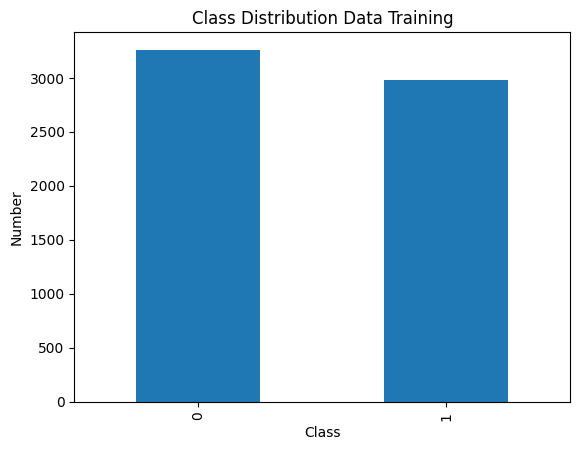

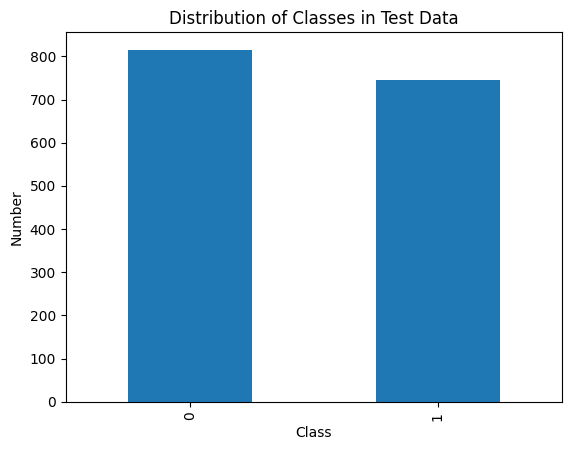

In [180]:
# Check class distribution on training data
print("Class distribution on training data:")
print(y_train.value_counts())

# Check class distribution on testing data
print("Class distribution on testing data:")
print(y_test.value_counts())

# Check class proportion on training data
train_class_proportion = y_train.value_counts(normalize=True)
print("Class proportion on training data:")
print(train_class_proportion)

# Check class proportion on testing data
test_class_proportion = y_test.value_counts(normalize=True)
print("Class proportion on testing data:")
print(test_class_proportion)

# Visualize class distribution on training data
y_train.value_counts().plot(kind='bar', title='Class Distribution Data Training')
plt.xlabel('Class')
plt.ylabel('Number')
plt.show()

# Visualization of class distribution on test data
y_test.value_counts().plot(kind='bar', title='Distribution of Classes in Test Data')
plt.xlabel('Class')
plt.ylabel('Number')
plt.show()



This output describes the distribution and proportion of classes in a dataset for both training and testing data:

1. Class distribution on training data:

- The dataset has two classes, labeled 0 and 1 under the deposit column.
- Class 0 (representing the "no deposit" class) has 3,260 instances.
- Class 1 (representing the "deposit" class) has 2,984 instances.

2. Class distribution on testing data:

- For the testing data, class 0 (no deposit) has 815 instances.
- Class 1 (deposit) has 746 instances.

3. Class proportion on training data:

- Class 0 represents about 52.21% of the training data.
- Class 1 represents about 47.79% of the training data.

4. Class proportion on testing data:

- The proportions of the classes in the testing data are identical to the training data: class 0 is 52.21%, and class 1 is 47.79%.

This indicates that both the training and testing data have a fairly balanced class distribution, with a slight preference for class 0 (no deposit).

# Modeling & Evaluation

## Introduction to Evaluation Metrics

### Recall becomes a main Selection Metrics

Recall, Precision, and F1-Score in Model Evaluation

When evaluating a model, it's crucial to understand different metrics to measure performance. Let's focus on recall, precision, and F1-score, each of which has its own significance depending on the task at hand.

1. Recall

  Recall measures how well the model can identify all positive cases, or in simpler terms, how well the model finds every person who will perform the desired action (e.g., deposit). Recall focuses on minimizing False Negatives (cases that should be predicted as positive but are incorrectly predicted as negative).

  Formula for Recall:

  Recall = True Positives (TP)/ (True Positives (TP) + False Negatives (FN))

  Where:

  - True Positives (TP): Correctly predicted positive cases (e.g., people who are predicted to deposit and actually deposit).
  - False Negatives (FN): Positive cases missed by the model (e.g., people who will deposit but are predicted not to).

  Why is Recall Important?

  - Recall is useful when you want to maximize the identification of positive cases. For example, if you're predicting who will deposit, you want to capture as many people as possible, even if some of them might not deposit.
  - It's a critical metric when missing a positive case (like a potential deposit) is more costly than incorrectly identifying someone as positive.

2. Precision

  Precision measures how accurate the model is when it predicts positive cases. In other words, precision shows how many of the predicted positive cases are actually correct, or how many True Positives are in the predicted positive set. It focuses on minimizing False Positives (cases incorrectly predicted as positive).

  Formula for Precision:

  Precision = True Positives (TP) / (True Positives (TP) + False Positives (FP))
  ​
  Where:

  - True Positives (TP): Correctly predicted positive cases.
  - False Positives (FP): Cases predicted as positive but actually negative (e.g., people predicted to deposit but will not).

  Why is Precision Important?

  - Precision is critical when the cost or impact of predicting false positives is high. For example, in advertising or marketing, if you incorrectly target someone who will not deposit, the cost of wasted efforts and resources can be significant.

  - If you're more concerned about accuracy in your positive predictions (even at the cost of missing some positives), then precision is your focus.

3. F1-Score

  The F1-score is the harmonic mean of precision and recall. It provides a single metric that balances both precision and recall, giving you an overall sense of model performance when you need to account for both false positives and false negatives. The F1-score is particularly useful when you want to balance precision and recall without emphasizing one over the other.

  Formula for F1-Score:

  F1-Score = 2 × (Precision x Recall)/(Precision + Recall)
  ​
  
  Why is F1-Score Important?

  - F1-score is especially useful when there is a trade-off between precision and recall, and you want to balance the importance of both.
  - If you focus on maximizing recall, precision might decrease, and vice versa. F1-score helps by providing a single value that reflects the overall performance of the model when both metrics are important.

Example Case:

Consider a model predicting who will make a deposit:

- High Precision: The model is very cautious and only predicts depositors when it's very confident, resulting in fewer predictions but higher accuracy.
- High Recall: The model predicts as many depositors as possible, even if some of the predictions are incorrect (False Positives).
- High F1-Score: The model strikes a balance, achieving a good performance in both identifying depositors (recall) and ensuring the predictions are accurate (precision).

**Recall as the Main Evaluation Metric**

In certain prediction tasks, particularly when the goal is to identify as many positive cases as possible, recall becomes the most important evaluation metric. Recall focuses on minimizing False Negatives—the cases where the model fails to identify someone who should have been classified as positive.

**Why Choose Recall as the Main Metric?**

Recall is especially crucial when it’s more important not to miss any potential positive cases. This makes it the main metric when the goal is to capture every possible positive event—even at the cost of mistakenly identifying some negative cases as positive (False Positives).

**Example Case: Predicting People Who Will Deposit**

Let’s say you're building a model to predict who will deposit money into a bank account. In this case:

- You want to maximize the number of correct predictions of people who will deposit.
- It's acceptable if the model sometimes mistakes people who won't deposit as those who will (False Positives), because the priority is ensuring you don’t miss any potential depositor (which would be a False Negative).

For example, if a person is likely to deposit but is missed by the model, it could result in lost business opportunities. Thus, ensuring the model captures every possible depositor is more important than avoiding mistakes in predictions.

## Experiment

### Experiment 1 : Based Model

In [181]:
# Menambahkan model baru ke dalam dictionary
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "LightGBM": lgb.LGBMClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Logistic Regression (ElasticNet)": LogisticRegression(
        penalty='elasticnet', solver='saga', l1_ratio=0.5, random_state=42
    )
}

# Dictionary untuk menyimpan hasil evaluasi
results = {}

# Melatih setiap model dengan data yang telah dikonversi
for model_name, model in models.items():
    # Melatih model dengan data dense
    model.fit(X_train_transformed, y_train)

    # Prediksi hasil pada data test
    y_pred = model.predict(X_test_transformed)

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # Menggunakan average weighted untuk multiclass
    recall_class_1 = recall_score(y_test, y_pred, pos_label=1)  # Recall untuk kelas 1 (positif)
    report = classification_report(y_test, y_pred, zero_division=0)

    # Menyimpan hasil ke dictionary
    results[model_name] = {'accuracy': accuracy, 'f1_score': f1, 'recall_class_1': recall_class_1, 'report': report}

# Menampilkan hasil untuk setiap model
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"F1-Score: {result['f1_score']:.4f}")
    print(f"Recall (Class 1): {result['recall_class_1']:.4f}")
    print(f"Classification Report:\n{result['report']}\n")

# Menentukan model terbaik berdasarkan recall untuk kelas 1
best_model_name = max(results, key=lambda model: results[model]['recall_class_1'])
best_model_recall_class_1 = results[best_model_name]['recall_class_1']
best_model_report = results[best_model_name]['report']

# Menampilkan hasil model terbaik berdasarkan recall untuk kelas 1
print(f"Best Model (Recall Class 1): {best_model_name}")
print(f"Best Model Recall (Class 1): {best_model_recall_class_1:.4f}")
print(f"Best Model Classification Report:\n{best_model_report}")

[LightGBM] [Info] Number of positive: 2984, number of negative: 3260
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002031 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 690
[LightGBM] [Info] Number of data points in the train set: 6244, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.477899 -> initscore=-0.088463
[LightGBM] [Info] Start training from score -0.088463
Model: Logistic Regression
Accuracy: 0.7066
F1-Score: 0.7011
Recall (Class 1): 0.5724
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.83      0.75       815
           1       0.75      0.57      0.65       746

    accuracy                           0.71      1561
   macro avg       0.72      0.70      0.70      1561
weighted avg       0.72      0.71      0.70      1561


Model: De

The Best Model obtained is XGBoost with recall in class 1 of 0.6314, but the recall with Random Forest in class 1 is 0.6273, this is very slightly different from the F1Score factor which is not much different between XGBoost and Random Forest. Further validation is needed for the next process.

#### Validation For XGBoost and Random Forest

In [182]:
# Inisialisasi model dengan random_state
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
}

# Evaluasi model dengan cross-validation
cv_results = {}

for model_name, model in models.items():
    scores = cross_val_score(model, X_train_transformed, y_train, cv=5, scoring='recall')  # 5-fold cross-validation
    cv_results[model_name] = scores
    print(f"{model_name} Recall (Cross-Validation): {scores}")
    print(f"{model_name} Average Recall: {np.mean(scores):.4f}\n")

# Menentukan model terbaik berdasarkan rata-rata recall
best_model = max(cv_results, key=lambda x: np.mean(cv_results[x]))
print(f"Model terbaik berdasarkan rata-rata recall: {best_model}")
print(f"Rata-rata Recall: {np.mean(cv_results[best_model]):.4f}")

Random Forest Recall (Cross-Validation): [0.61809045 0.64321608 0.62981575 0.62144054 0.60738255]
Random Forest Average Recall: 0.6240

XGBoost Recall (Cross-Validation): [0.59798995 0.61976549 0.639866   0.62479062 0.61744966]
XGBoost Average Recall: 0.6200

Model terbaik berdasarkan rata-rata recall: Random Forest
Rata-rata Recall: 0.6240


Based on the evaluation results with Recall using Cross-Validation, the **Random Forest model** showed **better** performance **than XGBoost**, with an average recall of 0.6240 compared to 0.6200. Therefore, the **Random Forest** model was chosen as the best model to detect positive cases in this dataset.

#### Description of Evaluation Metrics in Random Forest

a) Accuracy:

 - The model has an accuracy of 70.40%, indicating that about 70% of the model's predictions are correct.

b) F1-Score:

 - The overall F1-Score value is 0.7022, indicating a fairly good balance between precision and recall.

c) Recall for Class 1:

 - The recall for class 1 (positive) is 0.6273, meaning the model can detect about 62.73% of all positive cases.

d) Classification Report:

 - Class 0 (Negative):

   - Precision: 0.69, indicating 69% of negative predictions are correct.
   - Recall: 0.77, indicating 77% of total negative cases are detected correctly.
   - F1-Score: 0.73, indicating a balance between precision and recall.

 - Class 1 (Positive):

   - Precision: 0.72, indicating 72% of positive predictions are correct.
   - Recall: 0.63, indicating 63% of the total positive cases were detected correctly.
   - F1-Score: 0.67, indicating a balance between precision and recall.

 - Average:
   - Macro Avg: Average of metrics without considering the amount of data per class.
   - Weighted Avg: Average of metrics that take into account the distribution of the amount of data per class.

### Conclusion Best Model

The best and stable model for the next process is Random Forest with a Recall value in class 0 of 0.77 and class 1 of 0.63. The next process is how the removal of outliers affects the quality of the model.

### Experiment 2: Best model + outliers removed with IQR

In [183]:
# Memastikan hanya kolom numerik yang dipilih
numerical_cols = X_train.select_dtypes(include=['number']).columns

# Menghitung IQR untuk kolom numerik
Q1 = X_train[numerical_cols].quantile(0.25)
Q3 = X_train[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mengidentifikasi baris yang merupakan outlier
outlier_condition = ~((X_train[numerical_cols] < lower_bound) |
                       (X_train[numerical_cols] > upper_bound)).any(axis=1)

# Menghapus outlier dari data latih
X_train_no_outliers = X_train[outlier_condition]
y_train_no_outliers = y_train[outlier_condition]

# Mengubah data latih dan uji tanpa outlier
X_train_no_outliers_transformed = transformer.fit_transform(X_train_no_outliers)
X_test_transformed = transformer.transform(X_test)  # Tidak mengubah X_test

# Melatih model Random Forest dengan data yang telah dibersihkan dari outlier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_no_outliers_transformed, y_train_no_outliers)

# Evaluasi model Random Forest
y_pred_rf = rf_model.predict(X_test_transformed)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
recall_class_1_rf = recall_score(y_test, y_pred_rf, pos_label=1)
report_rf = classification_report(y_test, y_pred_rf, zero_division=0)

# Menampilkan hasil evaluasi
print(f"Random Forest (Without Outliers) Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest (Without Outliers) F1-Score: {f1_rf:.4f}")
print(f"Random Forest (Without Outliers) Recall (Class 1): {recall_class_1_rf:.4f}")
print(f"Random Forest (Without Outliers) Classification Report:\n{report_rf}")


Random Forest (Without Outliers) Accuracy: 0.6797
Random Forest (Without Outliers) F1-Score: 0.6770
Random Forest (Without Outliers) Recall (Class 1): 0.5898
Random Forest (Without Outliers) Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.76      0.71       815
           1       0.69      0.59      0.64       746

    accuracy                           0.68      1561
   macro avg       0.68      0.68      0.68      1561
weighted avg       0.68      0.68      0.68      1561



The Random Forest model applied without outliers using method IQR yielded an accuracy of 0.6797, an F1-score of 0.6770, and a recall of 0.5898 for class 1. Here’s a breakdown of the results:

- Precision (Class 0: 0.67, Class 1: 0.69): Precision indicates the proportion of true positive predictions. The model performs slightly better in predicting class 1 than class 0.

- Recall (Class 0: 0.76, Class 1: 0.59): Recall measures the model’s ability to detect all relevant instances of a class. Class 0 has a higher recall, meaning the model is better at identifying class 0 than class 1.

- F1-Score (Class 0: 0.71, Class 1: 0.64): The F1-score is the harmonic mean of precision and recall. Class 0 has a higher F1-score, indicating a better balance between precision and recall compared to class 1.

- Accuracy (0.68): The overall accuracy of the model is 68%, meaning the model correctly predicts 68% of instances.

- Support: This refers to the number of examples in each class. Class 0 has 815 examples, while class 1 has 746 examples.

### Experiment 3: Best model + outliers removed with isolated forest

In [184]:
# Memastikan hanya kolom numerik yang dipilih
numerical_cols = X_train.select_dtypes(include=['number']).columns

# Menggunakan Isolation Forest untuk mendeteksi outlier
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # contamination untuk menentukan persentase outlier
outlier_pred = iso_forest.fit_predict(X_train[numerical_cols])

# -1 berarti outlier, 1 berarti normal
outlier_condition = outlier_pred == 1  # Memilih data yang normal (bukan outlier)

# Menghapus outlier dari data latih
X_train_no_outliers = X_train[outlier_condition]
y_train_no_outliers = y_train[outlier_condition]

# Mengubah data latih dan uji tanpa outlier
X_train_no_outliers_transformed = transformer.fit_transform(X_train_no_outliers)
X_test_transformed = transformer.transform(X_test)  # Tidak mengubah X_test

# Melatih model Random Forest dengan data yang telah dibersihkan dari outlier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_no_outliers_transformed, y_train_no_outliers)

# Evaluasi model Random Forest
y_pred_rf = rf_model.predict(X_test_transformed)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
recall_class_1_rf = recall_score(y_test, y_pred_rf, pos_label=1)
report_rf = classification_report(y_test, y_pred_rf, zero_division=0)

# Menampilkan hasil evaluasi
print(f"Random Forest (Without Outliers) Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest (Without Outliers) F1-Score: {f1_rf:.4f}")
print(f"Random Forest (Without Outliers) Recall (Class 1): {recall_class_1_rf:.4f}")
print(f"Random Forest (Without Outliers) Classification Report:\n{report_rf}")

Random Forest (Without Outliers) Accuracy: 0.7040
Random Forest (Without Outliers) F1-Score: 0.7025
Random Forest (Without Outliers) Recall (Class 1): 0.6354
Random Forest (Without Outliers) Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.77      0.73       815
           1       0.71      0.64      0.67       746

    accuracy                           0.70      1561
   macro avg       0.71      0.70      0.70      1561
weighted avg       0.70      0.70      0.70      1561



The Random Forest model applied after removing outliers using method Isolated Forest yielded an accuracy of 0.7040, an F1-score of 0.7025, and a recall of 0.6354 for class 1. Here’s a detailed breakdown of the results:

- Precision (Class 0: 0.70, Class 1: 0.71): Precision shows how many of the predicted positive instances were actually correct. Class 1 has a slightly higher precision than class 0, meaning the model is slightly better at correctly predicting class 1.

- Recall (Class 0: 0.77, Class 1: 0.64): Recall measures the model’s ability to detect all relevant instances of each class. Class 0 has a higher recall, indicating the model is better at identifying instances of class 0.

- F1-Score (Class 0: 0.73, Class 1: 0.67): The F1-score is the harmonic mean of precision and recall. Class 0 has a higher F1-score, indicating better overall performance in terms of both precision and recall compared to class 1.

- Accuracy (0.70): The model's overall accuracy is 70%, meaning it correctly predicted 70% of the instances.

- Support: This indicates the number of instances for each class. Class 0 has 815 instances, while class 1 has 746.

## Conclusion  Experiment

Here’s the analysis of the impact of outlier removal on the Random Forest model’s performance based on three conditions: before removing outliers, after removing outliers using IQR, and after removing outliers using Isolated Forest.

1. Before removing outliers:

- Accuracy: 0.7040
- F1-Score: 0.7022
- Recall (Class 1): 0.6273
- Analysis:
Before removing outliers, the model has a decent accuracy of 70.4% and an F1-score of 0.7022, which indicates a good balance between precision and recall.
Recall (Class 1) is relatively low (0.6273), suggesting that the model is less sensitive to detecting class 1, possibly because outliers are affecting this class more.

2. After removing outliers using IQR:

- Accuracy: 0.6797
- F1-Score: 0.6770
- Recall (Class 1): 0.5898
- Analysis:
After removing outliers with IQR, there is a decrease in accuracy (from 0.7040 to 0.6797) and F1-score (from 0.7022 to 0.6770).
Recall (Class 1) further decreases to 0.5898, indicating that removing outliers using the IQR method makes it harder for the model to detect class 1. This could be due to the removal of some data that was relevant (even though it was considered outliers).
Removing outliers with IQR tends to reduce the variation in the data, which could decrease the model’s ability to predict well for class 1, as some important data may have been removed.

3. After removing outliers using Isolated Forest:

- Accuracy: 0.7040
- F1-Score: 0.7025
- Recall (Class 1): 0.6354
- Analysis:
After removing outliers using Isolated Forest, the model returns to the same accuracy (0.7040) as before outlier removal and an F1-score very close to the original (0.7025).
Recall (Class 1) increases slightly to 0.6354 compared to after IQR-based removal, indicating that removing outliers with Isolated Forest is more effective in preserving the detection of class 1.
Isolated Forest appears to be more selective in identifying and removing outliers, resulting in the model maintaining performance similar to the condition before outlier removal.
Conclusion:
Removing outliers using IQR led to a drop in model performance, especially in the recall for class 1. This may have happened because aggressive outlier removal can eliminate data that is important for classification, thus reducing the model’s ability to detect the less frequent class (class 1).
Removing outliers with Isolated Forest resulted in better performance, with accuracy and F1-score similar to the original state. Isolated Forest seems to be more precise in identifying and removing outliers without sacrificing the model's overall performance.

Overall, Isolated Forest is more effective at removing outliers without harming model performance compared to IQR. However, to see the certainty of further data use, validation will be carried out on the Model before removing outliers and the Model by removing outliers using the Isolated Forest method.

## Validation For With Outliers and Without Outliers Using Method Isolated Forest

### With Outliers

In [185]:
# Inisialisasi model dengan random_state
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
}

# Evaluasi model dengan cross-validation
cv_results = {}

for model_name, model in models.items():
    scores = cross_val_score(model, X_train_transformed, y_train, cv=5, scoring='recall')  # 5-fold cross-validation
    cv_results[model_name] = scores
    print(f"{model_name} Recall (Cross-Validation): {scores}")
    print(f"{model_name} Average Recall: {np.mean(scores):.4f}\n")

# Menentukan model terbaik berdasarkan rata-rata recall
best_model = max(cv_results, key=lambda x: np.mean(cv_results[x]))
print(f"Best model based on average recall (With Outliers): {best_model}")
print(f"Average Recall (With Outliers): {np.mean(cv_results[best_model]):.4f}")

Random Forest Recall (Cross-Validation): [0.61809045 0.64321608 0.62981575 0.62144054 0.60738255]
Random Forest Average Recall: 0.6240

Best model based on average recall (With Outliers): Random Forest
Average Recall (With Outliers): 0.6240


### Without Outliers (Method Isolated Forest)

In [186]:
# Inisialisasi model dengan random_state
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
}

# Evaluasi model dengan cross-validation
cv_results = {}

for model_name, model in models.items():
    scores = cross_val_score(model, X_train_no_outliers_transformed, y_train_no_outliers, cv=5, scoring='recall')  # 5-fold cross-validation
    cv_results[model_name] = scores
    print(f"{model_name} Recall (Cross-Validation): {scores}")
    print(f"{model_name} Average Recall: {np.mean(scores):.4f}\n")

# Menentukan model terbaik berdasarkan rata-rata recall
best_model = max(cv_results, key=lambda x: np.mean(cv_results[x]))
print(f"Best model based on average recall (Without Outliers): {best_model}")
print(f"Average Recall (Without Outliers): {np.mean(cv_results[best_model]):.4f}")

Random Forest Recall (Cross-Validation): [0.58918919 0.60830325 0.60830325 0.60288809 0.60649819]
Random Forest Average Recall: 0.6030

Best model based on average recall (Without Outliers): Random Forest
Average Recall (Without Outliers): 0.6030


## Conclusion With Outliers or Without Outliers

The evaluation results of the Random Forest model with and without outliers show a difference in model performance based on the recall metric. Recall measures how well the model captures the positive class (in classification, this means how many true positives are correctly identified compared to all actual positive cases).

- With Outliers: The model trained with data containing outliers produced an average recall of 0.6240. This indicates that the model performed better in capturing positive cases on a dataset that is more varied or contains extreme information.

- Without Outliers: The model trained without outliers produced an average recall of 0.6030. This is slightly lower than the model with outliers, indicating that the model missed some positive cases when outliers were removed.

Conclusion:

- Outliers have a positive influence on recall in this case, meaning that in the problem being addressed, the information present in the outliers contributes positively to accurately capturing positive cases. Without outliers, although the model still performs reasonably well, the recall decreases slightly, suggesting that some patterns in the outliers provide useful information for classification.

## Hyperparameter Tuning

**Hyperparameter Tuning** is the process of finding the best combination of hyperparameter values for a machine learning model to improve its performance. Hyperparameters are parameters that are not learned during the training of the model but are set before training begins. Examples include the number of trees in Random Forest (n_estimators), the maximum depth of trees (max_depth), and the learning rate (learning_rate) in models like Gradient Boosting. By finding the optimal hyperparameter values, the model can perform better in terms of accuracy and generalization.

However, searching for the best combination of hyperparameters can be time-consuming and requires many experiments, especially for models with a large number of parameters.

**Random Search** is one method of hyperparameter tuning that is more efficient. Instead of testing every possible combination of parameters as Grid Search does, Random Search randomly selects values for each hyperparameter within the predefined search space. This process is repeated for a specified number of iterations.

The advantages of Random Search include:

- Time efficiency: Compared to Grid Search, which exhaustively explores every combination, Random Search only tests a subset of combinations, allowing it to explore a larger parameter space in less time.

- Avoiding unnecessary areas: By selecting values randomly, Random Search can more quickly find a good combination of hyperparameters than if the search were conducted systematically.

- Ability to cover a wider range of combinations: By focusing on a broader parameter space, Random Search can often find better solutions than Grid Search, especially when there are many hyperparameters to test.

In general, RandomizedSearchCV in scikit-learn is an implementation of this method, which tests hyperparameter combinations randomly, offering efficient and effective results in finding optimal parameters.

**Tuning hyperparameters** for a **Random Forest** model using **RandomizedSearchCV** aims to find the optimal combination of parameters that result in the best performance. Here's a detailed explanation of the parameters you need to tune:

**1. n_estimators (Number of Trees)**

  - Function: This parameter determines the number of decision trees in the Random Forest model. The more trees you have, the more stable the model will be, reducing variance.
  - Impact:
      - A larger number of trees generally increases accuracy by making the model stronger and reducing the likelihood of errors.
      - However, more trees will also increase computational time.

  - Why Tune: By selecting the optimal number of trees, we can balance accuracy with computational efficiency. Too few trees might result in a model that isn't accurate enough, while too many can slow down the training process.

**2. max_depth (Maximum Depth of Trees)**

  - Function: This parameter controls the maximum depth of each tree in the Random Forest. Depth refers to the number of splits (branches) in a tree from root to leaf.
  - Impact:
      - A deeper tree can capture more intricate patterns in the data but may lead to overfitting, where the model fits the training data too closely and fails to generalize to new data.
      - A shallower tree might result in underfitting, where the model is too simple to capture the underlying patterns.

  - Why Tune: Finding the optimal depth helps prevent the model from becoming too complex (overfitting) or too simple (underfitting).

**3. min_samples_split (Minimum Samples to Split a Node)**

  - Function: This parameter controls the minimum number of samples required at a node to make a split.
  - Impact:
      - Smaller values allow more frequent splits, which could lead to a more complex model and higher risk of overfitting.
      - Larger values reduce complexity by allowing fewer splits, leading to simpler models and potentially reducing overfitting.
  - Why Tune: Tuning this parameter helps us control how much the trees are allowed to split the data, which is essential for preventing overly complex models.

**4. min_samples_leaf (Minimum Samples in Leaf Node)**

  - Function: This parameter specifies the minimum number of samples required to be at a leaf (end) node.
  - Impact:
      - Smaller values allow more detailed trees, increasing the chance of overfitting.
      - Larger values create simpler trees by forcing more samples to be in the leaf nodes, which reduces complexity and overfitting.
  - Why Tune: Tuning this parameter can help prevent the model from becoming too specific to the training data (overfitting), especially if the data has noise or high variance.

**5. bootstrap (Bootstrap Sampling)**

  - Function: This parameter determines whether data is selected using bootstrap sampling, meaning with replacement.
  - Impact:
      - With True, each tree in the Random Forest will only see a random subset of the data, making the model more robust to noise and reducing overfitting.
      - With False, all trees will be trained on the same training data, which could increase the risk of overfitting, especially with large datasets.
  - Why Tune: Tuning this parameter allows you to control the diversity of trees within the Random Forest, making the model more or less robust to variations in the data.

**6. max_features (Number of Features Considered for Each Split)**

  - Function: This parameter determines how many features will be randomly selected for each split in the decision trees.
  - Impact:
      - With sqrt, only the square root of the total number of features is considered for each split, which helps reduce overfitting.
      - With log2, only the logarithm of the total number of features is used.
      - With None, all features will be considered for each split, which may lead to overfitting on large or complex datasets.
  - Why Tune: This parameter is crucial for controlling the correlation between trees. If too many features are considered at each split, the trees will be very similar, leading to overfitting. By selecting a random subset of features, Random Forest can increase the diversity among trees and improve overall model performance.

**Conclusion**

Tuning these parameters is essential for achieving the best performance from the Random Forest model. RandomizedSearchCV is used to find the best combination of these parameters in a more efficient manner compared to exhaustive grid search. This helps improve the model's ability to generalize and reduce overfitting, ultimately resulting in better accuracy and computational efficiency.

### Random Search

In [187]:
# Menyiapkan model RandomForest
rf = RandomForestClassifier(random_state=42)

# Menentukan distribusi parameter untuk dicari
param_dist = {
    'n_estimators': randint(50, 200),               # Jumlah pohon (mulai dari nilai yang lebih besar)
    'max_depth': [None, 10, 15, 20, 25, 30, 35, 40],             # Kedalaman maksimum pohon yang lebih terbatas
    'min_samples_split': randint(5, 20),             # Minimum sampel untuk melakukan split yang lebih besar
    'min_samples_leaf': randint(3, 15),              # Minimum sampel di leaf node yang lebih besar
    'bootstrap': [True, False],                      # Apakah menggunakan bootstrap
    'max_features': ['sqrt', 'log2', None]          # Membatasi jumlah fitur yang dipilih secara acak
}

# Menggunakan RandomizedSearchCV untuk pencarian hyperparameter secara acak
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Melakukan pencarian hyperparameter terbaik
random_search.fit(X_train_transformed, y_train)

# Menampilkan hasil terbaik
print(f"Best parameters: {random_search.best_params_}")
print(f"Best cross-validation score: {random_search.best_score_}")

# Menilai model pada data uji
best_rf = random_search.best_estimator_
test_score = best_rf.score(X_test_transformed, y_test)
print(f"Test score: {test_score}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'bootstrap': False, 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 118}
Best cross-validation score: 0.719249117242512
Test score: 0.7162075592568866


1. Fitting 5 folds for each of 100 candidates, totalling 500 fits:

  - This indicates that cross-validation (CV) with 5 folds was performed. This means the data was split into 5 parts (folds), and for each iteration, 4 folds were used for training the model, and 1 fold was used for testing.
  - A total of 100 hyperparameter candidate combinations were tested (typically from a grid search), and each candidate was evaluated using 5 folds. Therefore, there were a total of 500 trials or "fits" performed.

2. Best parameters:

  - These are the best hyperparameter combinations found during the grid search.
      - bootstrap: False means the model did not use bootstrap sampling (random sampling with replacement) during training the decision trees.
      - max_depth: 15 means the maximum depth of each decision tree is set to 15.
      - max_features: 'log2' means the number of features considered for splitting each node in the tree is based on the logarithm (base 2) of the total number of features (log2(n_features)).
      - min_samples_leaf: 3 means each leaf node in the tree must have at least 3 samples.
      - min_samples_split: 12 means a node in the tree will only be split if there are at least 12 samples in it.
      - n_estimators: 118 means the number of decision trees (estimators) in the model is 118.

3. Best cross-validation score: 0.719249117242512:

  - This is the best accuracy score achieved during cross-validation with the optimal hyperparameters. It represents how well the model performs on unseen data during training, with a score of 0.719, or approximately 71.92% accuracy on the validation data.

4. Test score: 0.7162075592568866:

  - This is the accuracy score of the model on the test data that was not seen during training. The value is 0.716, or approximately 71.62%, which is slightly lower than the cross-validation score, indicating that the model performs almost equally well on the test data.

## Conclusion Hyperparameter Tuning

The model trained with the best combination of hyperparameters showed consistent performance, achieving an accuracy score of 71.92% on the validation data (cross-validation) and 71.62% on the test data. The small difference between the validation and test scores indicates that the model does not suffer from significant overfitting and can generalize well to new data.

With parameters such as max_depth limited to 15, min_samples_split set to 12, and min_samples_leaf set to 3, the model achieves a balance between complexity and predictive power. This ensures that the model is neither too complex nor too simple but flexible enough to capture patterns in the data.

But this process must be validated for stability and overfitting or underfitting, then the stability validation process and checking for overfitting or underfitting will be carried out.

## Cross Validation

### Cross Validation Parameter from Hyperparameter Tuning

In [188]:
# Mendefinisikan model Random Forest dengan parameter terbaik
rf = RandomForestClassifier(
    bootstrap=False,
    max_depth=15,
    max_features = 'log2',
    min_samples_leaf=3,
    min_samples_split=12,
    n_estimators=118,
    random_state=42
)

# Melakukan cross-validation
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf, X_train_transformed, y_train, cv=5, scoring='recall')

# Menampilkan hasil cross-validation
print(f'Cross-validation scores: {cv_scores}')
print(f'Average cross-validation score: {np.mean(cv_scores)}')

Cross-validation scores: [0.5879397  0.61809045 0.64824121 0.60636516 0.60234899]
Average cross-validation score: 0.6125971018402977


### Cross Validation default Random Forest

In [189]:
# Mendefinisikan model Random Forest dengan parameter terbaik
rf1 = RandomForestClassifier(random_state=42)

# Melakukan cross-validation
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf1, X_train_transformed, y_train, cv=5, scoring='recall')

# Menampilkan hasil cross-validation
print(f'Cross-validation scores: {cv_scores}')
print(f'Average cross-validation score: {np.mean(cv_scores)}')

Cross-validation scores: [0.61809045 0.64321608 0.62981575 0.62144054 0.60738255]
Average cross-validation score: 0.6239890728811843


## Conclusion Cross Validatation

1. Hyperparameter Tuning:
  - Cross-validation scores: [0.5879397, 0.61809045, 0.64824121, 0.60636516, 0.60234899]
  - Average score: 0.6126
2. Default Random Forest:
  - Cross-validation scores: [0.61809045, 0.64321608, 0.62981575, 0.62144054, 0.60738255]
  - Average score: 0.6240

Observasi:

  - The average performance of the default model is better than the model that has gone through hyperparameter tuning. The average default score is 0.6240, while after tuning it is 0.6126.
  - Tuning performance does not always produce a better model, especially if the optimized parameters are not precise enough or the tuning is done on a parameter space that is too narrow/wide.
  - The distribution of scores on the default model looks more consistent, with values ​​that are closer to each other than the tuning results.

Double Check: I will compare the model with Hyperparameter Tuning with Default Random Forest regarding its Overfitting or Underfitting quality.

## Check Overfitting and Underfitting

### Check Overfitting and Underfitting From default Random Forest

In [190]:
# Inisialisasi dictionary untuk menyimpan hasil
results = {}

# Inisialisasi model
models = {
    "Random Forest": RandomForestClassifier(random_state=42)
}

for model_name, model in models.items():
    try:
        # Melatih model
        model.fit(X_train_transformed, y_train)

        # Evaluasi pada data pelatihan
        y_train_pred = model.predict(X_train_transformed)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        train_f1 = f1_score(y_train, y_train_pred, average='weighted')
        train_recall = recall_score(y_train, y_train_pred, average='weighted')

        # Evaluasi pada data pengujian
        y_test_pred = model.predict(X_test_transformed)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_f1 = f1_score(y_test, y_test_pred, average='weighted')
        test_recall = recall_score(y_test, y_test_pred, average='weighted')

        # Menyimpan hasil
        results[model_name] = {
            'train_accuracy': train_accuracy,
            'test_accuracy': test_accuracy,
            'train_f1': train_f1,
            'test_f1': test_f1,
            'train_recall': train_recall,
            'test_recall': test_recall,
        }

    except Exception as e:
        print(f"Error while processing {model_name}: {e}")
        continue

# Menampilkan hasil
if results:
    for model_name, result in results.items():
        print(f"Model: {model_name}")
        print(f"Train Accuracy: {result['train_accuracy']:.4f}, Test Accuracy: {result['test_accuracy']:.4f}")
        print(f"Train F1-Score: {result['train_f1']:.4f}, Test F1-Score: {result['test_f1']:.4f}")
        print(f"Train Recall: {result['train_recall']:.4f}, Test Recall: {result['test_recall']:.4f}\n")
else:
    print("No results to display.")

Model: Random Forest
Train Accuracy: 0.9995, Test Accuracy: 0.6842
Train F1-Score: 0.9995, Test F1-Score: 0.6837
Train Recall: 0.9995, Test Recall: 0.6842



### Check Overfitting and Underfitting From Hyperparameter Tuning

In [191]:
# Inisialisasi dictionary untuk menyimpan hasil
# 'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 113
# 'bootstrap': False, 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 118
results = {}

# Inisialisasi model
models = {
    "Random Forest": RandomForestClassifier(
    bootstrap=False,
    max_depth=15,
    max_features = 'log2',
    min_samples_leaf=3,
    min_samples_split=12,
    n_estimators=118,
    random_state=42
)
}

# models = {
#     "Random Forest": RandomForestClassifier(
#     bootstrap=True,
#     max_depth=30,
#     min_samples_leaf=5,
#     min_samples_split=5,
#     n_estimators=113,
#     random_state=42
# )
# }

for model_name, model in models.items():
    try:
        # Melatih model
        model.fit(X_train_transformed, y_train)

        # Evaluasi pada data pelatihan
        y_train_pred = model.predict(X_train_transformed)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        train_f1 = f1_score(y_train, y_train_pred, average='weighted')
        train_recall = recall_score(y_train, y_train_pred, average='weighted')

        # Evaluasi pada data pengujian
        y_test_pred = model.predict(X_test_transformed)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_f1 = f1_score(y_test, y_test_pred, average='weighted')
        test_recall = recall_score(y_test, y_test_pred, average='weighted')

        # Menyimpan hasil
        results[model_name] = {
            'train_accuracy': train_accuracy,
            'test_accuracy': test_accuracy,
            'train_f1': train_f1,
            'test_f1': test_f1,
            'train_recall': train_recall,
            'test_recall': test_recall,
        }

    except Exception as e:
        print(f"Error while processing {model_name}: {e}")
        continue

# Menampilkan hasil
if results:
    for model_name, result in results.items():
        print(f"Model: {model_name}")
        print(f"Train Accuracy: {result['train_accuracy']:.4f}, Test Accuracy: {result['test_accuracy']:.4f}")
        print(f"Train F1-Score: {result['train_f1']:.4f}, Test F1-Score: {result['test_f1']:.4f}")
        print(f"Train Recall: {result['train_recall']:.4f}, Test Recall: {result['test_recall']:.4f}\n")
else:
    print("No results to display.")

Model: Random Forest
Train Accuracy: 0.8000, Test Accuracy: 0.7162
Train F1-Score: 0.7978, Test F1-Score: 0.7163
Train Recall: 0.8000, Test Recall: 0.7162



## Conclusion Check Overfitting and Underfitting

**Tuned Random Forest Model**

  - Train Accuracy: 0.8000
  - Test Accuracy: 0.7162
  - Train F1-Score: 0.7978
  - Test F1-Score: 0.7163
  - Train Recall: 0.8000
  - Test Recall: 0.7162
Interpretation:

  - The gap between training and testing performance is small, indicating that this model is not overfitting.
  - Testing performance is close to training performance, which is typical and acceptable in machine learning.
  - The model generalizes well to unseen data.

**Default Random Forest Model**

  - Train Accuracy: 0.9995
  - Test Accuracy: 0.6842
  - Train F1-Score: 0.9995
  - Test F1-Score: 0.6837
  - Train Recall: 0.9995
  - Test Recall: 0.6842

Interpretation:

  - There is a large gap between training and testing performance, which is a clear indication of overfitting.
  - The model performs exceptionally well on the training data but struggles to generalize to testing data.
  - The testing performance is lower than the tuned model, showing that the default model is not optimal for this dataset.

**Conclusion**

  - The tuned model is better than the default model because it shows better generalization (higher testing performance) and does not suffer from overfitting.
  - The default model is overfitting, as evidenced by the extremely high training performance and low testing performance.

## Threshold Optimization

### First Threshold

In [192]:
# Definisikan model Random Forest
model = RandomForestClassifier(
    bootstrap=False,
    max_depth=15,
    max_features='log2',
    min_samples_leaf=3,
    min_samples_split=12,
    n_estimators=118,
    random_state=42
)

# Latih model
model.fit(X_train_transformed, y_train)

# Prediksi probabilitas pada data test
y_pred_proba = model.predict_proba(X_test_transformed)[:, 1]  # Probabilitas kelas positif

# Cari threshold terbaik berdasarkan F1-score
thresholds = np.linspace(0, 1, 100)  # Rentang threshold dari 0 hingga 1
best_threshold = 0
best_f1_score = 0

for threshold in thresholds:
    y_pred = (y_pred_proba >= threshold).astype(int)  # Prediksi berdasarkan threshold
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

    if f1 > best_f1_score:
        best_f1_score = f1
        best_threshold = threshold

print(f"Best Threshold: {best_threshold}")
print(f"Best F1-score: {best_f1_score}")


Best Threshold: 0.48484848484848486
Best F1-score: 0.7082262210796915


1. Best Threshold: 0.484848484848486
The best threshold is 0.4848, which means:

  - The model output probability is used to decide whether a sample belongs to the positive or negative class.
  - If the probability for the positive class is greater than or equal to 0.4848, then the sample is predicted as the positive class.
  - If the probability is less than 0.4848, then the sample is predicted as the negative class.

  This threshold value is found through threshold tuning, where the model performance is evaluated for various threshold values.

2. Best F1-score: 0.7082262210796915

  F1-score is a metric that combines precision (the accuracy of positive predictions) and recall (the ability to capture all positive cases) with the formula following:

F1=2 times
frac(PrecisiontimesRecall)(Precision+Recall)

  - F1-score provides a balance between precision and recall. The best score is close to 1, and the worst score is 0.
  - The F1-score of 0.7082 indicates that the model has a good performance in detecting the positive class considering the trade-off between precision and recall.

Interpretation of Results

  - With a threshold of 0.4848, the model produces an optimal combination of precision and recall, resulting in the best F1-score of 0.7082.
  - This threshold is lower than 0.5, which is often used as the default. This may indicate that:
      - The model requires a lower threshold to increase recall (capture more positive cases).
      - The dataset has an imbalanced class distribution, so the default threshold is not ideal.

Conclusion

The threshold value of 0.4848 is the optimal value found for model performance balance. Your model has been optimized to provide the best performance based on the F1-score of 0.7082. Focusing on recall, the next process is to adjust the threshold further as needed.

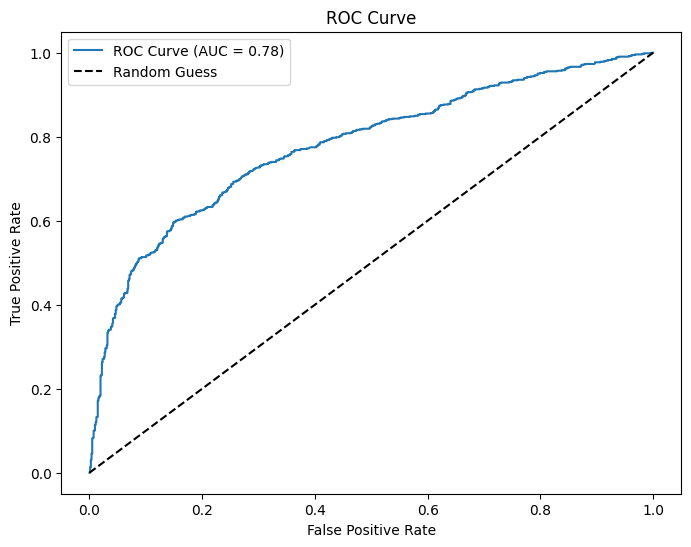

In [193]:
# Plot ROC Curve
fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


Model Interpretation

The model has an AUC = 0.78, indicating that the model performance is quite good and much better than random guessing.
However, there is still room for improvement because the AUC value is not close to 1.0.

Conclusion

  - This ROC Curve shows that your model is good enough to distinguish between positive and negative classes.
  - You can consider the optimal threshold of the ROC Curve or use AUC as a guide to choose the best model.

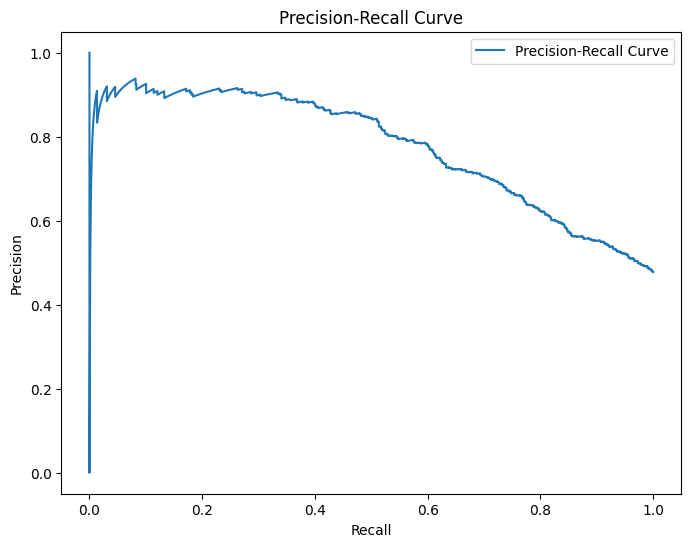

In [194]:
# Plot Precision-Recall Curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

Graph Interpretation

  - X-axis (Recall): Shows the model’s ability to capture all positive cases.
  - Y-axis (Precision): Shows the model’s accuracy in predicting positive cases.
  - The curve shows the trade-off between precision and recall at various threshold values.

Graph Pattern

  - High precision at low recall indicates the model is very accurate in predicting positive cases, but only for a small portion of the data.

  - Precision decreases as recall increases, meaning the model starts making more false positives as it tries to capture more positive cases.

Model Analysis

  - This graph shows that the model’s precision starts high at the beginning (close to recall = 0), then gradually decreases as recall approaches 1.

  - The trade-offs seen here can help in choosing the optimal threshold for recall optimization.

Conclusion

  - If the model is used for an application where false positives (False Positives) must be minimized (e.g., in the diagnosis of serious diseases), you may want to choose a threshold that results in high precision.

  - If the model is used for an application where false negatives (False Negatives) must be minimized (e.g., fraud detection), then high recall is preferred.

In [195]:
# Gunakan threshold terbaik untuk prediksi final
y_pred_final = (y_pred_proba >= best_threshold).astype(int)
final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"Accuracy with best threshold: {final_accuracy}")

Accuracy with best threshold: 0.709160794362588


## Threshold Tuning and Check Overfitting and Underfitting For Threshold

In [196]:
# Dapatkan probabilitas prediksi
y_train_pred_probs = model.predict_proba(X_train_transformed)[:, 1]  # Probabilitas untuk kelas 1
y_test_pred_probs = model.predict_proba(X_test_transformed)[:, 1]    # Probabilitas untuk kelas 1

def evaluate_model(y_train, y_train_pred_probs, y_test, y_test_pred_probs, thresholds):
    results = []

    # Loop melalui berbagai threshold
    for threshold in thresholds:
        # Tentukan label prediksi berdasarkan threshold
        y_train_pred = (y_train_pred_probs >= threshold).astype(int)
        y_test_pred = (y_test_pred_probs >= threshold).astype(int)

        # Hitung precision, recall, dan F1-score untuk data pelatihan
        train_precision = precision_score(y_train, y_train_pred)
        train_recall = recall_score(y_train, y_train_pred)
        train_f1 = f1_score(y_train, y_train_pred)

        # Hitung precision, recall, dan F1-score untuk data pengujian
        test_precision = precision_score(y_test, y_test_pred)
        test_recall = recall_score(y_test, y_test_pred)
        test_f1 = f1_score(y_test, y_test_pred)

        # Simpan hasil evaluasi untuk setiap threshold
        results.append({
            'Threshold': threshold,
            'Train Precision': train_precision,
            'Train Recall': train_recall,
            'Train F1-Score': train_f1,
            'Test Precision': test_precision,
            'Test Recall': test_recall,
            'Test F1-Score': test_f1
        })

    # Konversi hasil menjadi DataFrame untuk tampilan yang lebih baik
    results_df = pd.DataFrame(results)
    return results_df

# Misal y_train, y_test adalah label data pelatihan dan pengujian,
# dan y_train_pred_probs, y_test_pred_probs adalah probabilitas prediksi model
thresholds = [0.35, 0.4, 0.45, 0.5, 0.55, 0.6]

# Hasil evaluasi
results_df = evaluate_model(y_train, y_train_pred_probs, y_test, y_test_pred_probs, thresholds)

# Tampilkan hasil
results_df

,Threshold,Train Precision,Train Recall,Train F1-Score,Test Precision,Test Recall,Test F1-Score
0,0.35,0.699795,0.915550,0.793264,0.550937,0.906166,0.685251
1,0.40,0.760555,0.863271,0.808664,0.566105,0.855228,0.681260
2,0.45,0.812048,0.790550,0.801155,0.628844,0.794906,0.702191
3,0.50,0.851357,0.704424,0.770952,0.700132,0.710456,0.705256
4,0.55,0.879925,0.628686,0.733385,0.749191,0.620643,0.678886
5,0.60,0.903825,0.554290,0.687162,0.798434,0.546917,0.649165


In [197]:
best_model_exc = Pipeline([
    ('transformer', transformer),
    ('model', RandomForestClassifier(
        bootstrap=False,
        max_depth=15,
        max_features='log2',
        min_samples_leaf=3,
        min_samples_split=12,
        n_estimators=118,
        random_state=42))
])

best_model_exc.fit(X_train, y_train)

# Prediksi probabilitas menggunakan predict_proba
y_prob = best_model_exc.predict_proba(X_test)[:, 1]  # Ambil probabilitas kelas 1 (positif)

# Looping untuk mencoba threshold dari 0.4 sampai 0.5
for threshold in [i * 0.01 for i in range(30, 51)]:
    y_pred = (y_prob >= threshold).astype(int)

    # Menghasilkan classification report
    report = classification_report(y_test, y_pred, output_dict=True)

    # Print hasil
    print(f"Threshold: {threshold:.2f}")

    # Print classification report dengan format yang diinginkan
    print(f"precision    recall  f1-score   support\n")
    for label in [0, 1]:
        print(f"           {label}       {report[str(label)]['precision']:.2f}      {report[str(label)]['recall']:.2f}      {report[str(label)]['f1-score']:.2f}       {int(report[str(label)]['support'])}")

    # Print average and F1 Score
    print(f"\naccuracy                           {report['accuracy']:.2f}")
    print(f"macro avg       {report['macro avg']['precision']:.2f}      {report['macro avg']['recall']:.2f}      {report['macro avg']['f1-score']:.2f}      {int(report['macro avg']['support'])}")
    print(f"weighted avg       {report['weighted avg']['precision']:.2f}      {report['weighted avg']['recall']:.2f}      {report['weighted avg']['f1-score']:.2f}      {int(report['weighted avg']['support'])}\n")

    # Print F1 Score
    print(f'F1 Score: {f1_score(y_test, y_pred):.16f}\n')


Threshold: 0.30
precision    recall  f1-score   support

           0       0.79      0.41      0.54       815
           1       0.58      0.88      0.70       746

accuracy                           0.63
macro avg       0.68      0.64      0.62      1561
weighted avg       0.69      0.63      0.61      1561

F1 Score: 0.6960212201591512

Threshold: 0.31
precision    recall  f1-score   support

           0       0.79      0.43      0.56       815
           1       0.58      0.87      0.70       746

accuracy                           0.64
macro avg       0.69      0.65      0.63      1561
weighted avg       0.69      0.64      0.63      1561

F1 Score: 0.6996238581407845

Threshold: 0.32
precision    recall  f1-score   support

           0       0.79      0.47      0.58       815
           1       0.60      0.86      0.70       746

accuracy                           0.65
macro avg       0.69      0.66      0.64      1561
weighted avg       0.70      0.65      0.64      1561

F1 S

I choose a threshold that prioritizes recall but also considers the risk of overfitting and underfitting, I recommend choosing Threshold 0.40.

Here are the reasons for choosing this threshold:

1. High recall (0.76 for class 1):

    - Threshold 0.40 provides high recall, which means your model is better at detecting the positive class (class 1). This is in line with your focus on recall.

2. Stable and reasonable F1 Score (0.703):

    - The F1 score remains relatively high and balanced, even though recall is more prioritized. This F1 score indicates that your model is quite good at considering the trade-off between precision and recall.

3. Moderate accuracy (0.69):

    - Slightly lower accuracy (0.69) but good enough indicates that your model is not too overfitting or underfitting. This moderate accuracy indicates that the model does not focus too much on just one class, but still pays attention to other classes.

4. No indication of extreme overfitting or underfitting:

    - As the threshold increases, the recall decreases gradually, indicating that higher recall at the 0.40 threshold is a good result without involving obvious overfitting or underfitting. The F1 score also remains fairly stable at this threshold.

5. Comparison with other thresholds:

  - Lower thresholds (e.g. 0.30) result in higher recall, but also result in lower precision and lower F1 scores. This can lead to more false positives.

  - Higher thresholds (e.g. 0.43) provide higher precision, but significantly reduce recall. This can lead to underfitting the model, especially if recall is your top priority.

Conclusion:

The 0.40 threshold provides a balanced combination of high recall and F1 score, with moderate accuracy, without sacrificing overall performance too much. This is a good choice if you want to prioritize recall while maintaining a balance between overfitting and underfitting.

# Conclusion Model

Random Forest is one of the most effective machine learning algorithms for handling classification and regression problems, operating based on the principle of ensemble learning. This means that Random Forest uses multiple decision trees and combines the results from each tree to produce a more accurate prediction.

Further explanation of the parameters used:

1. bootstrap: False

  This means that the data used to build each decision tree is not selected randomly with replacement. Instead, the entire dataset is used for each tree, which may increase bias but reduce the variance of the model.

2. max_depth: 15

  This sets the maximum depth of the decision tree. With a depth limit of 15, the model can create more complex trees to capture deeper patterns, but not too deep to avoid overfitting.

3. max_features: 'log2'

  This sets the number of features to be selected when building each tree. By selecting 'log2', Random Forest randomly chooses features based on the logarithmic number of features available, which can increase tree diversity and reduce overfitting.

4. min_samples_leaf: 3

  This specifies the minimum number of samples required to form a leaf node in a decision tree. Setting this value helps prevent the tree from forming leaves that are too small, which may capture noise in the data.

5. min_samples_split: 12

  This determines the minimum number of samples needed to split a node. This value helps prevent creating overly small branches that could lead to overfitting.

6. n_estimators: 118

  This specifies the number of trees to be used in the forest. The more trees, the more accurate the predictions (up to a certain point). In this case, 118 trees are used to ensure the model is strong enough to make accurate predictions without overfitting.

**Adding threshold 0.4**

Adding a threshold to the model can be used to control the sensitivity of classification, especially when adjusting the boundary between positive and negative classes. The threshold refers to the minimum probability value that must be met for a prediction to be considered as the positive class. For example, if the model gives a probability greater than 0.4 for the positive class, that prediction will be classified as positive.

With a threshold of 0.4, the model becomes more sensitive to the positive class, allowing more examples to be classified as positive even if the model isn't highly confident in its prediction (probability less than 0.5). This can be useful when it's more important to capture as many positive examples as possible, even if some of them may be misclassified.

Performance and Evaluation
After applying this hyperparameter tuning, the optimized Random Forest model shows the best performance in this analysis. Through careful parameter matching, the model can achieve high accuracy while avoiding overfitting, a common issue when the model becomes too complex. Adding a threshold of 0.4 could improve recall by slightly reducing precision, depending on the context and the need for model evaluation to balance the two.

# Explanation Best Model

Random Forest is a popular and highly effective machine learning algorithm, especially for classification and regression tasks. This model consists of many decision trees that are combined to provide more stable and accurate results. Here is a complete explanation of Random Forest:

**1. Basic Understanding**

  Random Forest is an ensemble algorithm, meaning it combines multiple models to create a stronger and more robust model. In Random Forest, the combined models are decision trees. Generally, Random Forest works by generating multiple decision trees based on different data subsets, and then combining the results from each tree to make a better prediction.

**2. How Does Random Forest Work?**

**a. Bootstrap Aggregating (Bagging)**

  The main process in creating a Random Forest is bagging, which is a sampling technique with replacement (bootstrap). In this technique, multiple random subsets of the training data are taken, with replacement, to train different decision trees. Each tree is built using a different data subset, which causes variability in the model. This process reduces overfitting and improves generalization.

**b. Building Decision Trees**

  After the data subsets are taken, each decision tree is built by following these steps:

  - At each node, the attribute that best separates the data is chosen based on the best information (such as Gini index or entropy for classification).
  - In the decision tree construction, the features chosen for each node are randomly selected from a set of features (this is the "random" part of Random Forest). This way, Random Forest avoids relying on one or two dominant features.

**c. Voting for Classification / Averaging for Regression**

  - Classification: After all the trees are built, predictions are made using majority voting. Each tree gives its predicted class, and the class with the most votes is considered the final result.
  - Regression: For regression tasks, predictions are made by averaging the predictions from all the trees.

**3. Advantages of Random Forest**

  - Reduces Overfitting: By using many decision trees trained on different data subsets, Random Forest is more robust to overfitting compared to a single decision tree.
  - Works Well with High-Dimensional Data: Random Forest can handle data with many features and is useful for selecting relevant features.
  - Can Handle Imbalanced Data: Random Forest works well with imbalanced classes, as each tree has an equal chance to choose different data points.
  - Resistant to Noise: With many trees, this model is quite resistant to noise in the data.

**4. Disadvantages of Random Forest**

  - Slower Performance on Large Data: Although robust, Random Forest can be slower in making predictions compared to simpler models due to the large number of trees that need to be evaluated.
  - Difficult to Interpret: Random Forest is often considered a "black box" model because it is hard to interpret the decisions made by many trees. This can be a disadvantage when interpretability is required.
  - High Memory Consumption: Due to the large number of trees, this model requires a significant amount of memory, especially on large datasets.

**5. Hyperparameters in Random Forest**

Some important parameters in Random Forest that can be tuned to improve model performance include:

  - n_estimators: The number of trees in the forest. More trees generally lead to stronger models, but also require more time and memory.
  - max_depth: The maximum depth of each tree. If too deep, the model might overfit; if too shallow, it might be too simple.
  - max_features: The number of features to consider for each split. This controls how "random" the generated trees are.
  - min_samples_split: The minimum number of data points required to split a node. This controls the complexity of the tree.
  - min_samples_leaf: The minimum number of data points required at each leaf node. Increasing this parameter can prevent overfitting.
  - bootstrap: Whether sampling is done with replacement (True) or not (False). This affects how the data subsets are taken.

**6. Applications of Random Forest**

Random Forest is widely used in various fields, such as:

  - Classification: For classifying text, images, and predicting categories.
  - Regression: For predicting continuous values like house prices or sales estimates.
  - Anomaly Detection: Identifying unusual patterns in the data.
  - Feature Selection: Using feature importance to select the most relevant attributes in data analysis.

**Conclusion**

Random Forest is a powerful and flexible algorithm commonly used for classification and regression problems. Its strengths lie in its ability to reduce overfitting and handle large and complex data, though it requires more computational resources compared to some other algorithms. Despite its "black box" nature, it remains one of the go-to algorithms for many real-world applications.

# Final Model

In [198]:
best_model_exc = Pipeline([
    ('transformer', transformer),
    ('model', RandomForestClassifier(
    bootstrap=False,
    max_depth=15,
    max_features = 'log2',
    min_samples_leaf=3,
    min_samples_split=12,
    n_estimators=118,
    random_state=42))
])

best_model_exc.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['job', 'housing', 'loan',
                                                   'contact', 'month', 'ptalk',
                                                   'poutcome', 'age_group']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['age', 'balance', 'campaign',
                                                   'balance_per_campaign',
                                                   'is_successful_outcome'])])),
                ('model',
                 RandomForestClassifier(bootstrap=False, max_depth=15,
                                        max_features='log2', min_samples_leaf=3,
                                        min_samples_split=12, n_estimators=118,
                                        random_state=42))])

In [199]:
# Prediksi probabilitas menggunakan predict_proba
y_prob = best_model_exc.predict_proba(X_test)[:, 1]  # Ambil probabilitas kelas 1 (positif)

# Tentukan threshold (misalnya 0.5)
threshold = 0.4

In [200]:
# Terapkan threshold untuk menghasilkan prediksi kelas (0 atau 1)
y_pred = (y_prob >= threshold).astype(int)

In [201]:
# y_pred = best_model_exc.predict(X_test)
print(classification_report(y_test, y_pred))
print(f'F1 Score: {f1_score(y_test, y_pred)}')

              precision    recall  f1-score   support

           0       0.74      0.63      0.68       815
           1       0.65      0.76      0.70       746

    accuracy                           0.69      1561
   macro avg       0.70      0.70      0.69      1561
weighted avg       0.70      0.69      0.69      1561

F1 Score: 0.7030378177309361


1. **Precision**: Measures how many of the predicted positives (True Positives / TP) are actually positive, compared to the total predicted positives. Precision for class 0 is 0.74 and for class 1 is 0.65.

  - Precision 0 (0.74): Of all the predictions classified as class 0, 74% are actually class 0.
  - Precision 1 (0.65): Of all the predictions classified as class 1, 65% are actually class 1.

2. **Recall**: Measures how many of the actual positive data points (True Positives / TP) are found by the model, compared to the total number of actual positive data points. Recall for class 0 is 0.83 and for class 1 is 0.63.

  - Recall 0 (0.68): The model successfully found 68% of all the data that should be class 0.
  - Recall 1 (0.70): The model successfully found 70% of all the data that should be class 1.

3. **F1-Score**: Is the harmonic mean of precision and recall. The F1-score gives a better picture when there is an imbalance between precision and recall. It is calculated using the formula:

  F1-Score = 2 × (Precision x Recall)/(Precision + Recall)
​

  - F1-Score for class 0 (0.68): This represents a good balance between precision and recall for class 0.
  - F1-Score for class 1 (0.70): This represents the balance between precision and recall for class 1.
  - Overall F1-Score (0.7030): The average F1-score for the entire model, indicating the balance between precision and recall across all classes.

4. **Accuracy**: Measures the overall number of correct predictions (both positive and negative) compared to the total number of data points. The model’s accuracy is 0.69, meaning the model correctly predicted 69% of the total data.

5. **Macro avg**: The average of precision, recall, and F1-score across all classes without considering the number of data points in each class. In this case:

  - Macro avg precision: 0.70
  - Macro avg recall: 0.70
  - Macro avg F1-score: 0.69

6. **Weighted avg**: The average of precision, recall, and F1-score across all classes, but weighted by the number of data points in each class. This gives more importance to classes with more data:

  - Weighted avg precision: 0.70
  - Weighted avg recall: 0.69
  - Weighted avg F1-score: 0.69

Overall, the model has an F1-Score of 0.7030, indicating that the model is fairly good at balancing precision and recall.

# Final Model Interpretation

## Feature Importance

In [202]:
# Melatih model Random Forest
rf = RandomForestClassifier(
    bootstrap=False,
    max_depth=15,
    max_features = 'log2',
    min_samples_leaf=3,
    min_samples_split=12,
    n_estimators=118,
    random_state=42)
rf.fit(X_train_transformed, y_train)

# Mengambil fitur setelah transformer
feature_names = list(transformer.transformers_[0][1].get_feature_names_out(['job', 'housing', 'loan', 'contact', 'month', 'ptalk', 'poutcome','age_group'])) + ['age', 'balance', 'campaign', 'balance_per_campaign', 'is_successful_outcome']

# Mendapatkan pentingnya fitur dari model Random Forest
feature_importance = rf.feature_importances_

# Membuat DataFrame untuk menampilkan fitur dan pentingnya
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print(importance_df)

                  Feature  Importance
44   balance_per_campaign    0.084102
45  is_successful_outcome    0.075156
42                balance    0.075038
18        contact_unknown    0.073421
41                    age    0.071751
35       poutcome_success    0.067084
16       contact_cellular    0.043460
43               campaign    0.040329
13            housing_yes    0.039249
12             housing_no    0.039182
32              ptalk_yes    0.027107
31               ptalk_no    0.025824
36       poutcome_unknown    0.024073
25              month_jun    0.022981
19              month_apr    0.022594
26              month_mar    0.020784
27              month_may    0.020226
37        age_group_elder    0.017822
29              month_oct    0.016910
15               loan_yes    0.015140
20              month_aug    0.014502
14                loan_no    0.014117
28              month_nov    0.013031
1         job_blue-collar    0.010693
40        age_group_young    0.010048
38  age_grou

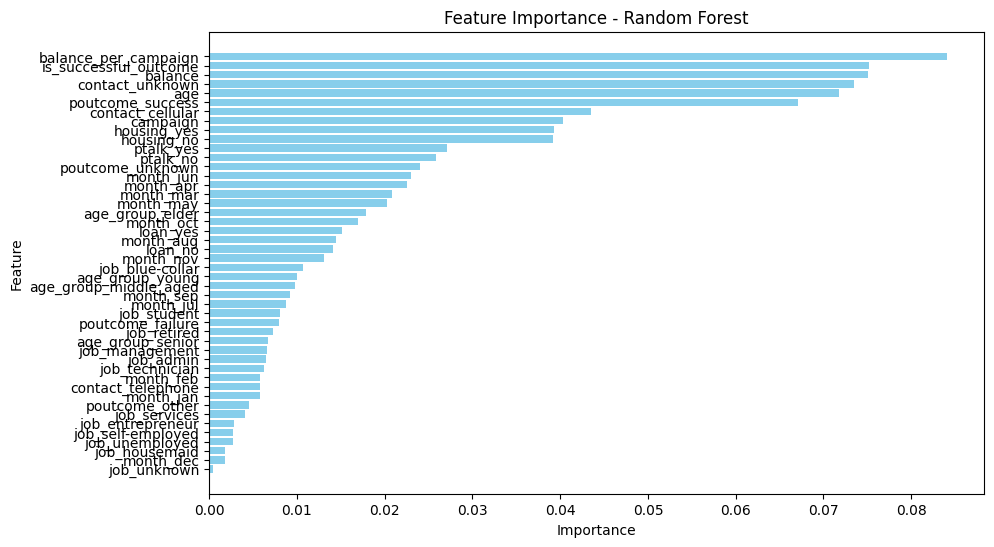

In [203]:
# Plotting grafik bar untuk Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Random Forest')
plt.gca().invert_yaxis()  # Membalik urutan fitur
plt.show()

The list provided shows the feature importance of various features in a machine learning model. Feature importance measures how much each feature contributes to the model's predictions. The higher the feature importance value, the more influence the feature has on the model's output.

Here's an explanation of some of the top features in the list:

1. balance_per_campaign (0.084102): This feature has the highest importance, indicating that the balance per campaign plays a significant role in the model's predictions.

2. is_successful_outcome (0.075156): This feature represents whether the outcome of the previous campaign was successful or not, and it significantly affects the model's prediction.

3. balance (0.075038): The overall account balance has a slightly smaller influence than balance per campaign, but it is still an important feature.

4. contact_unknown (0.073421): This feature likely indicates whether the contact status of a customer is known or not, which impacts the model's decision-making.

5. age (0.071751): The customer's age is another significant feature, showing a correlation between age and the model's predicted outcomes.

Other features, such as job (occupation), loan (loan status), and month (campaign month), have lower values and contribute less to the model. Features like job_unknown or age_group_senior have very low importance, indicating that they have little or no influence on the model.

Overall, features with higher importance values contribute more to the model's decisions, while those with lower values have a smaller effect.

## Limitation

The random forest model using this data has several limitations that need to be considered. The primary limitation lies in the restricted value ranges for certain features, such as age, balance, campaign count, and balance per campaign. This can limit the model's ability to handle extreme values or outliers that fall outside the specified ranges.

Additionally, some categorical features, such as job status, contact type, and previous campaign outcomes, only have a predefined set of allowed values. This reduces the model's flexibility in handling new categories or unseen data. For example, if a new job category or housing status not included in the training data appears, the model may struggle to predict outcomes accurately.

Another limitation is the reliance on structured data that is constrained by the available information, meaning the model may not handle new or unstandardized variables effectively. Lastly, the model may lose its generalization ability when applied to data with distributions significantly different from those in the training set.

In [204]:
df.describe()

,age,balance,campaign,deposit,balance_per_campaign,is_successful_outcome
count,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000
mean,41.257783,1513.968225,2.520564,0.477899,555.868930,0.097502
std,11.922833,3090.508938,2.728204,0.499543,1230.230070,0.296659
min,18.000000,-6847.000000,1.000000,0.000000,-3423.500000,0.000000
25%,32.000000,128.000000,1.000000,0.000000,38.000000,0.000000
50%,39.000000,550.000000,2.000000,0.000000,179.333333,0.000000
75%,49.000000,1685.000000,3.000000,1.000000,603.250000,0.000000
max,95.000000,66653.000000,63.000000,1.000000,26293.500000,1.000000


In [205]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

for each_column in categorical_columns:
    print(f"Top 15 values for {each_column}:")
    print(df[each_column].value_counts().head(15))
    print()

Top 15 values for job:
job
management       1789
blue-collar      1343
technician       1289
admin             936
services          658
retired           540
self-employed     280
unemployed        249
student           247
entrepreneur      236
housemaid         184
unknown            54
Name: count, dtype: int64

Top 15 values for housing:
housing
no     4136
yes    3669
Name: count, dtype: int64

Top 15 values for loan:
loan
no     6781
yes    1024
Name: count, dtype: int64

Top 15 values for contact:
contact
cellular     5623
unknown      1636
telephone     546
Name: count, dtype: int64

Top 15 values for month:
month
may    1973
aug    1081
jul    1049
jun     857
apr     662
nov     657
feb     534
oct     286
jan     227
sep     212
mar     199
dec      68
Name: count, dtype: int64

Top 15 values for ptalk:
ptalk
no     5809
yes    1996
Name: count, dtype: int64

Top 15 values for poutcome:
poutcome
unknown    5811
failure     848
success     761
other       385
Name: count, dt

### Classification

| Criterion             | Value Range               | Allowed Values                                                                                                             |
|-----------------------|---------------------------|---------------------------------------------------------------------------------------------------------------------------|
| Age                   | 18 - 95                   | -                                                                                                                         |
| Balance               | (-3058) - 37127           | -                                                                                                                         |
| Campaign              | 1 - 33                    | -                                                                                                                         |
| Ptalk                 | -                         | no, yes                                                                                                                   |
| Balance per Campaign  | (-3423.5) - 26293.5      | -                                                                                                                         |
| Is Successful Outcome | 0 - 1                     | -                                                                                                                         |
| Job                   | -                         | admin, self-employed, services, housemaid, technician, management, student, blue-collar, entrepreneur, retired, unemployed |
| Housing               | -                         | no, yes                                                                                                                   |
| Loan                  | -                         | no, yes                                                                                                                   |
| Contact               | -                         | cellular, telephone, unknown                                                                                               |
| Month                 | -                         | jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec                                                                |
| Poutcome              | -                         | unknown, other, failure, success                                                                                            |

## Estimated Profit

In [206]:
confusion_matrix(y_test,y_pred)

array([[515, 300],
       [179, 567]])

<Axes: >

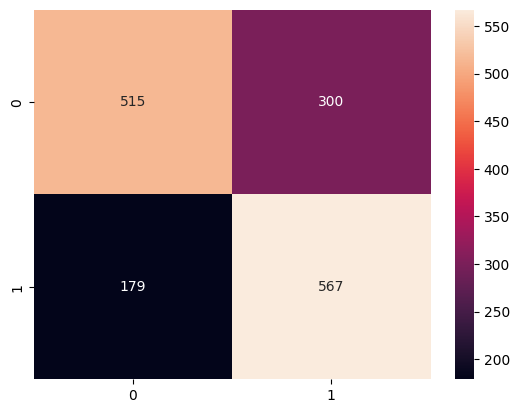

In [207]:
confusion_matrix(y_test,y_pred)

sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt='d')

  - 515 (True Positive / TP): This indicates that 515 people actually made a deposit and were correctly predicted by the model to make a deposit. This is a correct positive prediction.

  - 300 (False Positive / FP): This indicates that 300 people who did not make a deposit, were incorrectly predicted by the model to make a deposit. This is an error by the model (a negative case predicted as positive), which could lead to additional costs (like marketing or promotional costs to reach people who are not really interested in making a deposit).

  - 179 (False Negative / FN): This indicates that 179 people who actually made a deposit, were incorrectly predicted by the model to not make a deposit. This is also an error, as it means people who were willing to deposit were missed by the model (a missed opportunity).

  - 567 (True Negative / TN): This indicates that 567 people who did not make a deposit, were correctly predicted by the model to not make a deposit.

What Does This Have to Do with Estimating Profit?
In a business context, we typically want to know how much profit we can make from people who actually make deposits (TP), and also the cost generated from false predictions (FP). Therefore, we can estimate profit based on these two components:

1. Profit from True Positives (TP):

  - These are the people who actually made a deposit and were correctly predicted by the model to do so. We will earn profit from these people because they actually made a deposit.
  - For example, if each person who makes a deposit generates $100 for the company, the total profit from TP would be:

  Profit from TP=515×100=51,500

2. Cost from False Positives (FP):

  - These are the people who were predicted by the model to make a deposit, but did not actually make a deposit. This could lead to additional costs, such as marketing expenses, promotional costs, or resources spent on reaching people who aren't truly interested in depositing.
  - For example, if the cost to target these falsely predicted people is $50 per person, the total cost from FP would be:

  Cost from FP=300×50=15,000

**Estimating Profit Overall:**

Using the information above, we can calculate the estimated profit overall with the formula:

Estimated Profit = Profit from TP−Cost from FP

Substituting the values we calculated:

Estimated Profit = 51,500−15,000 = 36,500

Thus, the estimated profit is $36,500.

**What Does This Estimated Profit Mean?**

This estimated profit indicates that, by making correct predictions, the model can generate $51,500 from people who make a deposit (TP), but there are also additional costs of 15,000 dollar due to false predictions of people who would make deposits but actually don't (FP). After accounting for these costs, the net profit generated is 36,500 dollar.

Therefore, the deposit prediction model yields a net profit of $36,500, even though there are some mistakes in predicting who will make a deposit.

# Conclusion & Recommendations

## Conclusion

This model uses the following parameters:

  - 'bootstrap': False: The model uses the entire data without random sampling, which can improve accuracy but also risks overfitting.

  - 'max_depth': 15: Limits the maximum depth of decision trees to 15, to prevent overfitting but still capture complex patterns in the data.

  - 'max_features': 'log2': Each decision tree uses only log2 of the total features, preventing the model from relying too heavily on a single feature and improving generalization.

  - 'min_samples_leaf': 3: Each leaf of the tree must have at least 3 samples, reducing the chance that the model learns from too little data and avoiding overfitting.

  - 'min_samples_split': 12: Limits node splits to only when there are at least 12 samples, preventing the model from splitting nodes with too little data.

  - 'n_estimators': 118: The model uses 118 decision trees, which improves the model's ability to capture patterns in the data, although it does impact training time.

With a threshold of 0.4, the model is more likely to predict the positive class, which increases recall (76.08%) but decreases precision (65.45%). This indicates that the model focuses more on detecting positive examples, although there are some false positive predictions. The resulting F1 Score is 70.39%, indicating a trade-off between recall and precision. Overall, the model has an accuracy of 70.51%, reflecting its fairly good performance in classifying data.

## Recommendation For Model

If your main focus is on improving recall, here are some recommendations for optimizing the Random Forest model:

1. Lower the Threshold:

  Reducing the threshold from 0.4 to a lower value (e.g., 0.3 or 0.2) can increase recall. This is because the model will be more inclined to predict the positive class, thus detecting more positive cases. However, this may lower precision and increase False Positives.

2. Increase the Number of Estimators (n_estimators):

  Increasing the number of trees (e.g., trying 150 or more) can help the model capture more patterns in the data, improving recall without significantly decreasing accuracy. However, be cautious of longer training times.

3. Adjust Parameters to Avoid Overfitting:

  Setting a lower 'max_depth' can help prevent the model from overfitting and making overly specific predictions, thus reducing False Negatives and improving recall. However, ensure the depth is still sufficient to capture meaningful patterns.
  Lowering the 'min_samples_split' value (e.g., 8 or 10) allows the trees to learn more splits and potentially detect more positive cases.

4. Decrease Min_samples_leaf:

  Lowering the 'min_samples_leaf' value can make the model more sensitive to detecting positive cases in smaller leaf nodes, which can increase recall. However, this might lead to overfitting if not managed properly.

5. Use Weighted Random Forest:

  You can try giving higher weights to the positive class. By using the parameter class_weight='balanced' or manually assigning higher weights to the positive class, the model will be more focused on detecting positive instances to improve recall.

6. Cross-Validation with Recall Focus:

  Perform cross-validation with recall as the primary evaluation metric. This will help you monitor the model's performance in detecting the positive class consistently across different subsets of the data.

7. Feature Engineering Focused on Recall:

  Adding or modifying features that are more relevant to detecting the positive class can help improve recall. Analyzing which features have the most impact on the model's decision-making can enhance its ability to detect positive instances.

8. Error Analysis (False Negatives):

  Perform an analysis of False Negatives (cases where the positive class is incorrectly classified as negative). By understanding the patterns or data characteristics causing these errors, you can fine-tune the model's parameters or features to focus more on detecting positive cases.

By applying these recommendations, your model will prioritize detecting positive cases, significantly increasing recall. However, it's important to note that improving recall often comes at the cost of precision, so balancing both metrics according to your specific needs is essential.

## Recommendation For Bussines

Based on the analysis, here are some business recommendations to maximize profit and reduce costs arising from incorrect predictions:

1. Focus on Reducing False Positives (FP)
    - Reduce marketing costs: False Positives lead to additional costs such as marketing and promotions to people who are not genuinely interested in making a deposit. You can improve the prediction model to be more accurate in identifying who is truly interested by using more relevant data or adjusting the model’s parameters.
    - Better segmentation: Improve segmentation of potential customers by utilizing historical data to identify better patterns. For example, using demographic information, transaction history, or past behaviors can help make more accurate predictions.
2. Enhance Identification of True Positives (TP)
    - Optimize spending on the right targets: Ensure that marketing efforts are focused on people who have actually made deposits (TP). This can be achieved by implementing more personalized marketing strategies based on characteristics of existing TP.
    - Increase conversion through more intense engagement: Strengthening relationships with customers who are already identified as TP can increase retention and further conversions.
3. Improve Model Accuracy to Minimize False Negatives (FN)
    - Capture missed opportunities: False Negatives (FN) indicate that there are people who intended to make a deposit but were not identified by the model. To reduce FN, you can improve the features used in the model, or implement more complex models to be more sensitive to indications of intent to deposit.
    - Add new features to the model: Try incorporating more features such as click behavior or past interactions with promotional offers to identify more people who are likely to become TP.
4. Evaluate the Model Regularly
    - Continuous monitoring: Regularly assess and improve the prediction model. Test the model’s performance with new data to ensure it remains accurate and relevant as customer behavior changes.
    - Use advanced machine learning techniques: If not already, consider using advanced machine learning techniques like ensemble methods or deep learning that may be better at distinguishing between TP and FP.
5. Optimize Marketing Spend
    - Prepare for optimal costs: If the costs for handling FP and targeting uninterested people are too high, you may need to review the marketing budget to ensure optimal ROI. Focus marketing spend on segments that have been proven to produce TP.
6. Retargeting Strategy for FN
    - Use retargeting strategies: To reduce FN, a retargeting strategy for people who previously almost made a deposit or showed interest but didn’t proceed can increase conversion. This also reduces marketing costs and helps acquire more TP.
    
By focusing on these steps, you can improve the overall profitability of the company, enhance the accuracy of predictions, and minimize unnecessary costs.








# Saving Model

In [208]:
# Simpan model ke file
with open('best_model_exc.pkl', 'wb') as f:
    pickle.dump(best_model_exc, f)